In [11]:
import numpy as np
import pandas as pd
import datetime as datetime
#import pandas_datareader.data as web
#import quandl
import blpapi
from xbbg import blp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import utils

import seaborn as sns

In [421]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
file = 'EQ Comparison.xlsx'
tab = 'bbTickers'


In [12]:
pd.options.display.precision
pd.options.display.float_format = '{:,.4f}'.format

6

In [423]:
def cusip2bb(cusips):
    
    bbtkrs = blp.bdp(tickers=cusips+" Equity", flds=["TICKER_AND_EXCH_CODE"])
    bbtkrs.reset_index(inplace=True)
    #cusip2bb_map = dict(zip(cusips,bbtkrs))
    bbtkrs_map = dict(zip(bbtkrs['index'],bbtkrs['ticker_and_exch_code']))
    cusips_call = cusips+" Equity"
    miss_keys = np.setdiff1d(cusips_call,list(bbtkrs_map.keys()))

    fx_keys = [s for s in miss_keys if "BEN" in s]
    cash_keys = [s for s in miss_keys if "CASH" in s]
    oth_keys = [s for s in miss_keys if "X" in s[0]]
    key_stocks = np.setdiff1d(miss_keys,oth_keys)
    key_stocks = np.setdiff1d(key_stocks,cash_keys)
    key_stocks = np.setdiff1d(key_stocks,fx_keys)
    codes = [i.strip(' Equity')[1:8] for i in key_stocks]
    codes = [i + ' Equity' for i in codes]
    bbtkrs_o = blp.bdp(tickers=codes, flds=["TICKER_AND_EXCH_CODE"])
    bbtkrs_o.reset_index(inplace=True)
    bbtkrs_omap = dict(zip(bbtkrs_o['index'],bbtkrs_o['ticker_and_exch_code']))

    bbtkrs_map = {**bbtkrs_map,**bbtkrs_omap}
    
    return bbtkrs_map, cash_keys, oth_keys, fx_keys

# unused now?
#cusips = stocks['CUSIP'].str.lstrip("ABCDEFGHIJKLMNOPQRSTUVWXYZ").values

# Strategy Level 1

In [13]:
fileSL = 'Strategy Level 1 View 12-14-21.xlsx'
unclean = pd.read_excel(dirpath+fileSL,skiprows=3).dropna(subset=['Market Value %'])
unclean

mmap = pd.read_excel(dirpath+'MasterMap4GSS.xlsx',sheet_name='master map')
mmap.dropna(subset=['BBTicker'],inplace=True)

,Security Description,Filter Level 1,Filter Level 2,Filter Level 3,Level,CUSIP,Price,Market Value %,Current Face (m),Market Value (m),Risk Contribution %,Risk Contribution,X,Sigma,Rho
0,ONGSS,ONGSS,NaN,NaN,1.0000,NaN,NaN,1.0000,"298,830,747.0340","571,197,615.0665",1.0000,"1,373.1880",NaN,NaN,NaN
1,IDIOSYNCRATIC,ONGSS,IDIOSYNCRATIC,NaN,2.0000,NaN,NaN,0.3145,"5,794,672.0000","179,619,441.0740",0.4472,614.0690,NaN,NaN,NaN
2,APOLLO GLOBAL MANAGEMENT INC,ONGSS,IDIOSYNCRATIC,APOLLO GLOBAL MANAGEMENT INC,3.0000,NaN,NaN,0.0940,"602,307.0000","53,705,865.8064",0.1477,202.8122,NaN,NaN,NaN
3,APOLLO GLOBAL MANAGEMENT INC CLASS,ONGSS,IDIOSYNCRATIC,APOLLO GLOBAL MANAGEMENT INC,0.0000,03768E105,69.6100,0.0940,"602,307.0000","53,705,865.8064",0.1477,202.8122,9.4023,"3,520.4451",0.6127
4,CONTROLADORA VUELA CIA-ADR,ONGSS,IDIOSYNCRATIC,CONTROLADORA VUELA CIA-ADR,3.0000,NaN,NaN,0.0494,"1,375,926.0000","28,235,128.4034",0.1066,146.3341,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,SHORT HEDGE,ONGSS,SHORT HEDGE,NaN,2.0000,NaN,NaN,-0.0805,"-232,442.0000","-45,973,876.7439",-0.0759,-104.2119,NaN,NaN,NaN
115,APARTMENT INCOME REIT CO,ONGSS,SHORT HEDGE,APARTMENT INCOME REIT CO,3.0000,NaN,NaN,-0.0011,"-9,302.0000","-646,767.7437",-0.0010,-1.3924,NaN,NaN,NaN
116,APARTMENT INCOME REIT CORP,ONGSS,SHORT HEDGE,APARTMENT INCOME REIT CO,0.0000,03750L109,54.2800,-0.0011,"-9,302.0000","-646,767.7437",-0.0010,-1.3924,-0.1132,"2,172.8880",0.5659
117,INVESCO S&P 500 EQUAL WEIGHT,ONGSS,SHORT HEDGE,INVESCO S&P 500 EQUAL WEIGHT,3.0000,NaN,NaN,-0.0794,"-223,140.0000","-45,327,109.0001",-0.0749,-102.8195,NaN,NaN,NaN


In [14]:
mask = unclean['CUSIP'].isnull()
groups = unclean.loc[mask]
stocks = unclean.loc[~mask]
groups

stocks.rename(columns={'CUSIP':'ACUSIP'},inplace=True)
stocks

,Security Description,Filter Level 1,Filter Level 2,Filter Level 3,Level,CUSIP,Price,Market Value %,Current Face (m),Market Value (m),Risk Contribution %,Risk Contribution,X,Sigma,Rho
0,ONGSS,ONGSS,NaN,NaN,1.0000,NaN,NaN,1.0000,"298,830,747.0340","571,197,615.0665",1.0000,"1,373.1880",NaN,NaN,NaN
1,IDIOSYNCRATIC,ONGSS,IDIOSYNCRATIC,NaN,2.0000,NaN,NaN,0.3145,"5,794,672.0000","179,619,441.0740",0.4472,614.0690,NaN,NaN,NaN
2,APOLLO GLOBAL MANAGEMENT INC,ONGSS,IDIOSYNCRATIC,APOLLO GLOBAL MANAGEMENT INC,3.0000,NaN,NaN,0.0940,"602,307.0000","53,705,865.8064",0.1477,202.8122,NaN,NaN,NaN
4,CONTROLADORA VUELA CIA-ADR,ONGSS,IDIOSYNCRATIC,CONTROLADORA VUELA CIA-ADR,3.0000,NaN,NaN,0.0494,"1,375,926.0000","28,235,128.4034",0.1066,146.3341,NaN,NaN,NaN
6,ELEMENT FLEET MANAGEMENT COR,ONGSS,IDIOSYNCRATIC,ELEMENT FLEET MANAGEMENT COR,3.0000,NaN,NaN,0.0541,"2,416,388.0000","30,881,438.6400",0.0731,100.3316,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,ARK GENOMIC REVOLUTION ETF,ONGSS,REAL RATES,ARK GENOMIC REVOLUTION ETF,3.0000,NaN,NaN,-0.0055,"-40,298.0000","-3,124,025.6420",-0.0079,-10.8296,NaN,NaN,NaN
112,INVESCO QQQ TRUST SERIES 1,ONGSS,REAL RATES,INVESCO QQQ TRUST SERIES 1,3.0000,NaN,NaN,-0.0479,"-54,448.0000","-27,358,238.6583",-0.0369,-50.6927,NaN,NaN,NaN
114,SHORT HEDGE,ONGSS,SHORT HEDGE,NaN,2.0000,NaN,NaN,-0.0805,"-232,442.0000","-45,973,876.7439",-0.0759,-104.2119,NaN,NaN,NaN
115,APARTMENT INCOME REIT CO,ONGSS,SHORT HEDGE,APARTMENT INCOME REIT CO,3.0000,NaN,NaN,-0.0011,"-9,302.0000","-646,767.7437",-0.0010,-1.3924,NaN,NaN,NaN


C:\Users\jknechtel\Miniconda3\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Security Description,Filter Level 1,Filter Level 2,Filter Level 3,Level,ACUSIP,Price,Market Value %,Current Face (m),Market Value (m),Risk Contribution %,Risk Contribution,X,Sigma,Rho
3,APOLLO GLOBAL MANAGEMENT INC CLASS,ONGSS,IDIOSYNCRATIC,APOLLO GLOBAL MANAGEMENT INC,0.0000,03768E105,69.6100,0.0940,"602,307.0000","53,705,865.8064",0.1477,202.8122,9.4023,"3,520.4451",0.6127
5,CONTROLADORA VUELA COMPANIA ADR RE,ONGSS,IDIOSYNCRATIC,CONTROLADORA VUELA CIA-ADR,0.0000,21240E105,16.0200,0.0494,"1,375,926.0000","28,235,128.4034",0.1066,146.3341,4.9431,"5,767.7980",0.5133
7,ELEMENT FLEET MANAGEMENT CORP,ONGSS,IDIOSYNCRATIC,ELEMENT FLEET MANAGEMENT COR,0.0000,SB7FNMQ21,12.7800,0.0541,"2,416,388.0000","30,881,438.6400",0.0731,100.3316,5.4064,"3,091.2756",0.6003
9,ARITZIA SUBORDINATE VOTING INC,ONGSS,IDIOSYNCRATIC,ARITZIA INC-SUBORDINATE VOTI,0.0000,SBDCG2C28,50.4100,0.0304,"344,902.0000","17,386,509.8200",0.0440,60.4771,3.0439,"4,021.6433",0.4940
11,API GROUP CORP,ONGSS,IDIOSYNCRATIC,API GROUP CORP,0.0000,00187Y100,23.5600,0.0404,"763,981.0000","23,056,321.6435",0.0421,57.7797,4.0365,"4,005.8292",0.3573
13,BERRY GLOBAL GROUP INC,ONGSS,IDIOSYNCRATIC,BERRY GLOBAL GROUP INC,0.0000,08579W103,70.6600,0.0461,"291,168.0000","26,354,176.7607",0.0337,46.3342,4.6138,"2,631.8093",0.3816
16,WILLSCOT MOBILE MINI HOLDINGS CORP,ONGSS,LONG CYCLE,WILLSCOT MOBILE MINI HOLDING,0.0000,971378104,39.2100,0.1450,"1,649,455.0000","82,845,608.4780",0.2535,348.1003,14.5038,"3,426.4327",0.7005
19,ALPHABET INC CLASS C,ONGSS,GARP GROWTH,ALPHABET INC-CL C,0.0000,SBYY88Y78,"2,934.0900",0.0664,"10,085.0000","37,903,691.7748",0.0574,78.8609,6.6358,"2,372.5189",0.5009
21,META PLATFORMS INC CLASS A,ONGSS,GARP GROWTH,META PLATFORMS INC-CLASS A,0.0000,30303M102,334.4900,0.0540,"72,012.0000","30,854,619.0956",0.0554,76.1138,5.4017,"2,801.5213",0.5030
23,AMAZON COM INC,ONGSS,GARP GROWTH,AMAZON.COM INC,0.0000,023135106,"3,391.3500",0.0201,"2,644.0000","11,485,932.0249",0.0126,17.3142,2.0109,"2,213.8745",0.3889


In [15]:
mmap.drop(columns=['Security Description'],inplace=True)
stocks = stocks.merge(mmap,left_on='ACUSIP',right_on='ACUSIP')
stocks

,Security Description,Filter Level 1,Filter Level 2,Filter Level 3,Level,ACUSIP,Price,Market Value %,Current Face (m),Market Value (m),Risk Contribution %,Risk Contribution,X,Sigma,Rho,Groups,CUSIP,BBCUSIP,BBTicker,Bbcall
0,APOLLO GLOBAL MANAGEMENT INC CLASS,ONGSS,IDIOSYNCRATIC,APOLLO GLOBAL MANAGEMENT INC,0.0000,03768E105,69.6100,0.0940,"602,307.0000","53,705,865.8064",0.1477,202.8122,9.4023,"3,520.4451",0.6127,IDIOSYNCRATIC,03768E105,03768E105 Equity,APO US,APO US Equity
1,CONTROLADORA VUELA COMPANIA ADR RE,ONGSS,IDIOSYNCRATIC,CONTROLADORA VUELA CIA-ADR,0.0000,21240E105,16.0200,0.0494,"1,375,926.0000","28,235,128.4034",0.1066,146.3341,4.9431,"5,767.7980",0.5133,IDIOSYNCRATIC,21240E105,21240E105 Equity,VLRS US,VLRS US Equity
2,ELEMENT FLEET MANAGEMENT CORP,ONGSS,IDIOSYNCRATIC,ELEMENT FLEET MANAGEMENT COR,0.0000,SB7FNMQ21,12.7800,0.0541,"2,416,388.0000","30,881,438.6400",0.0731,100.3316,5.4064,"3,091.2756",0.6003,IDIOSYNCRATIC,B7FNMQ2,B7FNMQ2 Equity,EFN CN,EFN CN Equity
3,ARITZIA SUBORDINATE VOTING INC,ONGSS,IDIOSYNCRATIC,ARITZIA INC-SUBORDINATE VOTI,0.0000,SBDCG2C28,50.4100,0.0304,"344,902.0000","17,386,509.8200",0.0440,60.4771,3.0439,"4,021.6433",0.4940,IDIOSYNCRATIC,BDCG2C2,BDCG2C2 Equity,ATZ CN,ATZ CN Equity
4,API GROUP CORP,ONGSS,IDIOSYNCRATIC,API GROUP CORP,0.0000,00187Y100,23.5600,0.0404,"763,981.0000","23,056,321.6435",0.0421,57.7797,4.0365,"4,005.8292",0.3573,IDIOSYNCRATIC,00187Y100,00187Y100 Equity,APG US,APG US Equity
5,BERRY GLOBAL GROUP INC,ONGSS,IDIOSYNCRATIC,BERRY GLOBAL GROUP INC,0.0000,08579W103,70.6600,0.0461,"291,168.0000","26,354,176.7607",0.0337,46.3342,4.6138,"2,631.8093",0.3816,IDIOSYNCRATIC,08579W103,08579W103 Equity,BERY US,BERY US Equity
6,WILLSCOT MOBILE MINI HOLDINGS CORP,ONGSS,LONG CYCLE,WILLSCOT MOBILE MINI HOLDING,0.0000,971378104,39.2100,0.1450,"1,649,455.0000","82,845,608.4780",0.2535,348.1003,14.5038,"3,426.4327",0.7005,LONG CYCLE,971378104,971378104 Equity,WSC US,WSC US Equity
7,ALPHABET INC CLASS C,ONGSS,GARP GROWTH,ALPHABET INC-CL C,0.0000,SBYY88Y78,"2,934.0900",0.0664,"10,085.0000","37,903,691.7748",0.0574,78.8609,6.6358,"2,372.5189",0.5009,GARP GROWTH,BYY88Y7,BYY88Y7 Equity,GOOG US,GOOG US Equity
8,META PLATFORMS INC CLASS A,ONGSS,GARP GROWTH,META PLATFORMS INC-CLASS A,0.0000,30303M102,334.4900,0.0540,"72,012.0000","30,854,619.0956",0.0554,76.1138,5.4017,"2,801.5213",0.5030,GARP GROWTH,30303M102,30303M102 Equity,FB US,FB US Equity
9,AMAZON COM INC,ONGSS,GARP GROWTH,AMAZON.COM INC,0.0000,023135106,"3,391.3500",0.0201,"2,644.0000","11,485,932.0249",0.0126,17.3142,2.0109,"2,213.8745",0.3889,GARP GROWTH,023135106,023135106 Equity,AMZN US,AMZN US Equity


# Master Map

ignore this section, I did it another way.

In [16]:
stocks.to_excel(dirpath+'strippedStocks.xlsx')

In [278]:
#cusips = stocks['ACUSIP'].values
#bbtkrs, cash_keys, oth_keys, fx_keys = cusip2bb(cusips)
#bbtkrs
#cash_keys
#oth_keys
#fx_keys
eqtckrs = list(bbtkrs.values())
#bbtkrs = cusip2bb(cusips)
len(eqtckrs)
#dict(zip(cusips,bbtkrs['ticker_and_exch_code'].values))
[ tck + ' Equity'  for tck in eqtckrs ]

In [271]:
#stocks.rename(columns={'CUSIP':'ACUSIP'},inplace=True)
#stocks.sort_values('ACUSIP',inplace=True)
#mmap.sort_values('ACUSIP',inplace=True)

#stocks.loc[stocks['ACUSIP'].isin(mmap['ACUSIP']),'CUSIP'] = mmap['CUSIP']
#stocks.loc[stocks['ACUSIP'].isin(mmap['ACUSIP']),['BBCUSIP','BBTicker','Bbcall']] = mmap[['BBCUSIP','BBTicker','Bbcall']]
#stocks.merge(mmap,left_on='ACUSIP',right_on='ACUSIP')
#stocks.drop(columns=['CUSIP','BBCUSIP','BBTicker','Bbcall'],inplace=True)

C:\Users\jknechtel\Miniconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [279]:
stocks['Bbcall']

0          APO US Equity
1         VLRS US Equity
2          APG US Equity
3          EFN CN Equity
4          ATZ CN Equity
5         BERY US Equity
6          WSC US Equity
7         POSH US Equity
8           FB US Equity
9         GOOG US Equity
10        AMZN US Equity
11         NRG US Equity
12         AON US Equity
13        WLTW US Equity
14         TKA GY Equity
15        FANG US Equity
16        TROX US Equity
17         FIS US Equity
18        ARMK US Equity
19         JET LN Equity
20        MAPS US Equity
21         DAL US Equity
22         UAL US Equity
23        APTV US Equity
24         CPB US Equity
25         GIS US Equity
26           K US Equity
27         XLP US Equity
28        SITE US Equity
29          HA US Equity
30         CJT CN Equity
31        AIRC US Equity
32    9000039D US Equity
33        TRUP US Equity
34        DASH US Equity
35        BIGC US Equity
36        ABNB US Equity
37        AMRS US Equity
38        MGNI US Equity
39        APPN US Equity


In [243]:
#stocks['BBtckr'] = stocks['CUSIP'].map()
#stocks['CUSIP'].map(bbtkrs)
#([st +' Equity' for st in stocks['CUSIP']]).isin(bbtkrs.keys())
bbtkrs.keys().str.isin([st +' Equity' for st in stocks['CUSIP']])

AttributeError: 'dict_keys' object has no attribute 'str'

# Bloomberg Grab

In [17]:
from datetime import datetime, date
from pandas.tseries.offsets import *
sdate = (pd.Timestamp.today()-252*BusinessDay()).strftime("%Y-%m-%d")
date = pd.Timestamp.today().strftime("%Y-%m-%d")

In [18]:
index_ntr = blp.bdh(tickers=stocks['Bbcall'] , flds=['RT117'],start_date=sdate, end_date=date)
#index_ntr.to_csv(dirpath + 'GSS_NTR.csv')
    
index_ntr

,APO US Equity,VLRS US Equity,EFN CN Equity,ATZ CN Equity,APG US Equity,BERY US Equity,WSC US Equity,GOOG US Equity,FB US Equity,AMZN US Equity,...,FSLY US Equity,TTCF US Equity,ARKK US Equity,TRUP US Equity,DDD US Equity,AAL US Equity,LMND US Equity,ARKG US Equity,QQQ US Equity,AIRC US Equity
,RT117,RT117,RT117,RT117,RT117,RT117,RT117,RT117,RT117,RT117,...,RT117,RT117,RT117,RT117,RT117,RT117,RT117,RT117,RT117,RT117
2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,48.3600,11.2800,NaN,NaN,17.7700,55.1300,23.0000,"1,776.0900",277.0000,"3,283.9600",...,90.2200,23.4200,129.8000,119.8400,11.2200,16.0600,107.6700,101.6200,312.6800,38.3600
2020-12-29,48.0700,11.8300,13.3300,26.0600,17.6500,54.9600,23.0400,"1,758.7200",276.7800,"3,322.0000",...,89.5100,22.6800,126.3643,118.0400,10.1500,15.8600,118.3400,94.9201,312.9600,38.0000
2020-12-30,48.5800,12.0300,13.1650,25.8900,17.8500,56.1500,23.0600,"1,739.5200",271.8700,"3,285.8500",...,90.4300,24.3200,129.1900,121.3400,10.6900,16.1500,129.8900,96.8462,312.9700,38.3900
2020-12-31,48.9800,12.4200,13.4464,25.7900,18.1500,56.1900,23.1700,"1,751.8800",273.1600,"3,256.9300",...,87.3700,22.8900,126.5371,119.7100,10.4800,15.7700,122.5000,94.0428,313.7400,38.4100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08,73.6354,16.2700,13.1516,51.3900,24.4100,71.9700,40.6600,"2,974.4100",330.5600,"3,523.1600",...,43.2100,16.2700,104.9173,152.2000,23.5500,18.2300,49.6000,65.6565,401.0194,54.9740
2021-12-09,73.0551,16.1500,13.1516,50.9200,23.7400,71.6300,40.0400,"2,962.1200",329.8200,"3,483.4200",...,41.1200,15.9500,99.3371,152.8900,22.6300,18.1400,46.5100,62.2482,395.1187,53.7804
2021-12-10,72.1845,16.1900,13.1924,51.3000,23.8500,71.9700,39.7200,"2,973.5000",329.7500,"3,444.2400",...,40.4400,16.0400,97.7514,144.2000,22.2200,18.0100,43.2100,61.1591,399.4138,54.2578


In [19]:
gssrets = index_ntr.droplevel(1,axis=1).pct_change()
gssrets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2020-12-25 to 2021-12-14
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   APO US Equity   251 non-null    float64
 1   VLRS US Equity  251 non-null    float64
 2   EFN CN Equity   250 non-null    float64
 3   ATZ CN Equity   250 non-null    float64
 4   APG US Equity   251 non-null    float64
 5   BERY US Equity  251 non-null    float64
 6   WSC US Equity   251 non-null    float64
 7   GOOG US Equity  251 non-null    float64
 8   FB US Equity    251 non-null    float64
 9   AMZN US Equity  251 non-null    float64
 10  AON US Equity   251 non-null    float64
 11  WLTW US Equity  251 non-null    float64
 12  NRG US Equity   251 non-null    float64
 13  FIS US Equity   251 non-null    float64
 14  ARMK US Equity  251 non-null    float64
 15  TKA GY Equity   251 non-null    float64
 16  TROX US Equity  251 non-null    float64
 17  JET LN Equity   250 non-

In [20]:
indices = ['SPX Index','SPXT Index','SPTR Index','RU20INTR Index','RU10INTR Index','SPTSXN Index',
           'SP400NTR Index','SPTRSMCN Index']

beta_df = blp.bdh(tickers=indices, flds=['PX_LAST'],start_date=sdate, end_date=date)

#call = True

#if call:
    
#    sectors_df.to_csv('H:/Asset Allocation/Data/Sectors_NTR.csv')
#else:
#    sectors_df = pd.read_csv('H:/Asset Allocation/Data/Sectors_NTR.csv')    
    
beta_df

,SPX Index,SPXT Index,SPTR Index,RU20INTR Index,RU10INTR Index,SPTSXN Index,SP400NTR Index,SPTRSMCN Index
,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST
2020-12-28,"3,735.3600","7,715.1000","7,715.1020","10,228.0400","12,473.6900",NaN,"3,375.3300","1,435.8600"
2020-12-29,"3,727.0400","7,697.9300","7,697.9260","10,039.8000","12,437.2200",219.6000,"3,338.0400","1,413.4400"
2020-12-30,"3,732.0400","7,709.1000","7,709.0980","10,148.2600","12,464.2300",219.8000,"3,366.3700","1,427.4400"
2020-12-31,"3,756.0700","7,759.3500","7,759.3450","10,122.2700","12,531.0900",218.4000,"3,372.0700","1,428.6900"
2021-01-04,"3,700.6500","7,645.2700","7,645.2690","9,974.1600","12,347.7100",219.6500,"3,317.7900","1,413.3800"
...,...,...,...,...,...,...,...,...
2021-12-07,"4,686.7500","9,812.2000","9,812.1970","11,654.2600","15,599.9020",270.0000,"4,129.0100","1,793.4800"
2021-12-08,"4,701.2100","9,842.6800","9,842.6830","11,747.2400","15,663.8400",268.9400,"4,152.8700","1,801.8500"
2021-12-09,"4,667.4500","9,773.1900","9,773.1910","11,482.0400","15,529.3700",267.0900,"4,093.1600","1,772.2100"


In [21]:
betarets = beta_df.droplevel(1,axis=1).pct_change()
betarets.fillna(0,inplace=True)

In [22]:
betarets

,SPX Index,SPXT Index,SPTR Index,RU20INTR Index,RU10INTR Index,SPTSXN Index,SP400NTR Index,SPTRSMCN Index
2020-12-28,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-12-29,-0.0022,-0.0022,-0.0022,-0.0184,-0.0029,0.0000,-0.0110,-0.0156
2020-12-30,0.0013,0.0015,0.0015,0.0108,0.0022,0.0009,0.0085,0.0099
2020-12-31,0.0064,0.0065,0.0065,-0.0026,0.0054,-0.0064,0.0017,0.0009
2021-01-04,-0.0148,-0.0147,-0.0147,-0.0146,-0.0146,0.0057,-0.0161,-0.0107
...,...,...,...,...,...,...,...,...
2021-12-07,0.0207,0.0207,0.0207,0.0228,0.0214,0.0145,0.0168,0.0145
2021-12-08,0.0031,0.0031,0.0031,0.0080,0.0041,-0.0039,0.0058,0.0047
2021-12-09,-0.0072,-0.0071,-0.0071,-0.0226,-0.0086,-0.0069,-0.0144,-0.0164
2021-12-10,0.0095,0.0096,0.0096,-0.0038,0.0079,-0.0016,0.0009,0.0002


# Aggregate to Groups, Long/Short and Total Portfolio

In [23]:
stocks = stocks.loc[stocks['Bbcall'].isin(gssrets.columns)]

In [24]:
gssrets.fillna(0,inplace=True)
for grp in stocks['Groups'].unique():
    #grp
    grpstks = stocks.loc[stocks['Groups']==grp,'Bbcall']
    #grpstks
    #gssrets.loc[:,grpstks]
    stocks.loc[stocks['Bbcall'].isin(grpstks),'Market Value %'].T
    gssrets[grp] = (gssrets.loc[:,grpstks]*stocks.loc[stocks['Bbcall'].isin(grpstks),'Market Value %'].values).sum(axis=1)/\
        abs((stocks.loc[stocks['Bbcall'].isin(grpstks),'Market Value %'].T).sum())

0   0.0940
1   0.0494
2   0.0541
3   0.0304
4   0.0404
5   0.0461
Name: Market Value %, dtype: float64

6   0.1450
Name: Market Value %, dtype: float64

7   0.0664
8   0.0540
9   0.0201
Name: Market Value %, dtype: float64

10   0.0638
11   0.0458
Name: Market Value %, dtype: float64

12   0.0651
Name: Market Value %, dtype: float64

13   0.0311
14   0.0112
Name: Market Value %, dtype: float64

15   0.0171
16   0.0135
Name: Market Value %, dtype: float64

17   0.0209
Name: Market Value %, dtype: float64

18   0.3732
19   0.0001
Name: Market Value %, dtype: float64

20   -0.0020
21   -0.0019
Name: Market Value %, dtype: float64

22   -0.0012
23   -0.0024
24   -0.0026
Name: Market Value %, dtype: float64

25   -0.0053
26   -0.0757
Name: Market Value %, dtype: float64

27   -0.0005
28   -0.0005
29   -0.0008
30   -0.0014
31   -0.0009
32   -0.0009
33   -0.0012
34   -0.0022
35   -0.0016
36   -0.0026
37   -0.0014
38   -0.0019
39   -0.0015
40   -0.0055
41   -0.0479
Name: Market Value %, dtype: float64

42   -0.0011
Name: Market Value %, dtype: float64

In [25]:
strategies = stocks['Groups'].unique()

In [26]:
gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(dirpath+'SubStrategy.xlsx')

In [27]:
stocks

,Security Description,Filter Level 1,Filter Level 2,Filter Level 3,Level,ACUSIP,Price,Market Value %,Current Face (m),Market Value (m),Risk Contribution %,Risk Contribution,X,Sigma,Rho,Groups,CUSIP,BBCUSIP,BBTicker,Bbcall
0,APOLLO GLOBAL MANAGEMENT INC CLASS,ONGSS,IDIOSYNCRATIC,APOLLO GLOBAL MANAGEMENT INC,0.0000,03768E105,69.6100,0.0940,"602,307.0000","53,705,865.8064",0.1477,202.8122,9.4023,"3,520.4451",0.6127,IDIOSYNCRATIC,03768E105,03768E105 Equity,APO US,APO US Equity
1,CONTROLADORA VUELA COMPANIA ADR RE,ONGSS,IDIOSYNCRATIC,CONTROLADORA VUELA CIA-ADR,0.0000,21240E105,16.0200,0.0494,"1,375,926.0000","28,235,128.4034",0.1066,146.3341,4.9431,"5,767.7980",0.5133,IDIOSYNCRATIC,21240E105,21240E105 Equity,VLRS US,VLRS US Equity
2,ELEMENT FLEET MANAGEMENT CORP,ONGSS,IDIOSYNCRATIC,ELEMENT FLEET MANAGEMENT COR,0.0000,SB7FNMQ21,12.7800,0.0541,"2,416,388.0000","30,881,438.6400",0.0731,100.3316,5.4064,"3,091.2756",0.6003,IDIOSYNCRATIC,B7FNMQ2,B7FNMQ2 Equity,EFN CN,EFN CN Equity
3,ARITZIA SUBORDINATE VOTING INC,ONGSS,IDIOSYNCRATIC,ARITZIA INC-SUBORDINATE VOTI,0.0000,SBDCG2C28,50.4100,0.0304,"344,902.0000","17,386,509.8200",0.0440,60.4771,3.0439,"4,021.6433",0.4940,IDIOSYNCRATIC,BDCG2C2,BDCG2C2 Equity,ATZ CN,ATZ CN Equity
4,API GROUP CORP,ONGSS,IDIOSYNCRATIC,API GROUP CORP,0.0000,00187Y100,23.5600,0.0404,"763,981.0000","23,056,321.6435",0.0421,57.7797,4.0365,"4,005.8292",0.3573,IDIOSYNCRATIC,00187Y100,00187Y100 Equity,APG US,APG US Equity
5,BERRY GLOBAL GROUP INC,ONGSS,IDIOSYNCRATIC,BERRY GLOBAL GROUP INC,0.0000,08579W103,70.6600,0.0461,"291,168.0000","26,354,176.7607",0.0337,46.3342,4.6138,"2,631.8093",0.3816,IDIOSYNCRATIC,08579W103,08579W103 Equity,BERY US,BERY US Equity
6,WILLSCOT MOBILE MINI HOLDINGS CORP,ONGSS,LONG CYCLE,WILLSCOT MOBILE MINI HOLDING,0.0000,971378104,39.2100,0.1450,"1,649,455.0000","82,845,608.4780",0.2535,348.1003,14.5038,"3,426.4327",0.7005,LONG CYCLE,971378104,971378104 Equity,WSC US,WSC US Equity
7,ALPHABET INC CLASS C,ONGSS,GARP GROWTH,ALPHABET INC-CL C,0.0000,SBYY88Y78,"2,934.0900",0.0664,"10,085.0000","37,903,691.7748",0.0574,78.8609,6.6358,"2,372.5189",0.5009,GARP GROWTH,BYY88Y7,BYY88Y7 Equity,GOOG US,GOOG US Equity
8,META PLATFORMS INC CLASS A,ONGSS,GARP GROWTH,META PLATFORMS INC-CLASS A,0.0000,30303M102,334.4900,0.0540,"72,012.0000","30,854,619.0956",0.0554,76.1138,5.4017,"2,801.5213",0.5030,GARP GROWTH,30303M102,30303M102 Equity,FB US,FB US Equity
9,AMAZON COM INC,ONGSS,GARP GROWTH,AMAZON.COM INC,0.0000,023135106,"3,391.3500",0.0201,"2,644.0000","11,485,932.0249",0.0126,17.3142,2.0109,"2,213.8745",0.3889,GARP GROWTH,023135106,023135106 Equity,AMZN US,AMZN US Equity


In [28]:
gssrets['GSS'] = (gssrets.loc[:,stocks['Bbcall']]*stocks['Market Value %'].values).sum(axis=1)/\
        (stocks['Market Value %'].values).sum()
lmask = (stocks['Market Value %']>0) & (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Longs'] = (gssrets.loc[:,stocks.loc[lmask,'Bbcall']]*stocks.loc[lmask,'Market Value %'].values).sum(axis=1)
smask = (stocks['Market Value %']<=0) & (stocks['ACUSIP']!='XCAD00009') & (stocks['ACUSIP']!='XUSD00000')
gssrets['Shorts'] = (gssrets.loc[:,stocks.loc[smask,'Bbcall']]*stocks.loc[smask,'Market Value %'].values).sum(axis=1)


In [29]:

#gssrets['GSS']
#missing_dates = gssrets.loc[~gssrets.index.isin(betarets.index)].index
#missing_dates
#betarets.index = gssrets.index
allrets = gssrets.join(betarets)
allrets.fillna(0,inplace=True)
allrets

,APO US Equity,VLRS US Equity,EFN CN Equity,ATZ CN Equity,APG US Equity,BERY US Equity,WSC US Equity,GOOG US Equity,FB US Equity,AMZN US Equity,...,Longs,Shorts,SPX Index,SPXT Index,SPTR Index,RU20INTR Index,RU10INTR Index,SPTSXN Index,SP400NTR Index,SPTRSMCN Index
2020-12-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-12-28,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-12-29,-0.0060,0.0488,0.0000,0.0000,-0.0068,-0.0031,0.0017,-0.0098,-0.0008,0.0116,...,0.0016,0.0009,-0.0022,-0.0022,-0.0022,-0.0184,-0.0029,0.0000,-0.0110,-0.0156
2020-12-30,0.0106,0.0169,-0.0124,-0.0065,0.0113,0.0217,0.0009,-0.0109,-0.0177,-0.0109,...,0.0027,-0.0011,0.0013,0.0015,0.0015,0.0108,0.0022,0.0009,0.0085,0.0099
2020-12-31,0.0082,0.0324,0.0214,-0.0039,0.0168,0.0007,0.0048,0.0071,0.0047,-0.0088,...,0.0104,0.0003,0.0064,0.0065,0.0065,-0.0026,0.0054,-0.0064,0.0017,0.0009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08,0.0008,0.0143,-0.0008,-0.0071,0.0162,0.0007,0.0165,0.0046,0.0240,-0.0000,...,0.0076,-0.0010,0.0031,0.0031,0.0031,0.0080,0.0041,-0.0039,0.0058,0.0047
2021-12-09,-0.0079,-0.0074,0.0000,-0.0091,-0.0274,-0.0047,-0.0152,-0.0041,-0.0022,-0.0113,...,-0.0099,0.0023,-0.0072,-0.0071,-0.0071,-0.0226,-0.0086,-0.0069,-0.0144,-0.0164
2021-12-10,-0.0119,0.0025,0.0031,0.0075,0.0046,0.0047,-0.0080,0.0038,-0.0002,-0.0112,...,-0.0015,-0.0007,0.0095,0.0096,0.0096,-0.0038,0.0079,-0.0016,0.0009,0.0002
2021-12-13,-0.0006,-0.0105,-0.0124,-0.0173,-0.0122,-0.0182,-0.0128,-0.0133,0.0144,-0.0154,...,-0.0055,0.0023,-0.0091,-0.0091,-0.0091,-0.0141,-0.0092,-0.0068,-0.0105,-0.0171


In [30]:
gssrets[['Longs','Shorts']].corr()

,Longs,Shorts
Longs,1.0000,-0.8019
Shorts,-0.8019,1.0000


In [491]:
.to_excel(dirpath+'SubStrategy.xlsx',sheet_name='Aggregate Correlations')
#.savefig("H:/Asset Allocation/Research Code/Asset_PairPlot.png") 
#['GSS','Longs','Shorts'].append(betarets.columns)

In [502]:
#gssrets[strategies]
allrets[strategies]

,IDIOSYNCRATIC,LONG CYCLE,FX HEDGE,GARP GROWTH,VALUE,"LOW VOL, QUALITY",SHORT CYCLE,RE-OPEN,DURATION,COMPOUNDER,CASH,CYCLICAL/QUALITY,MAGNA HEDGE,COST INFLATION,SHORT ALPHA,SHORT HEDGE,REAL RATES,BETA
2020-11-17,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000
2020-11-18,-0.0101,0.0296,0.0000,-0.0119,-0.0172,-0.0195,-0.0067,-0.0170,-0.0150,-0.0020,0.0000,0.0097,0.0053,-0.0124,-0.0117,-0.0000,-0.0040,-0.0131
2020-11-19,0.0050,-0.0196,0.0000,0.0066,-0.0118,-0.0037,0.0016,0.0265,0.0027,0.0079,0.0000,-0.0013,0.0027,0.0048,0.0082,-0.0000,0.0102,0.0056
2020-11-20,-0.0122,-0.0028,0.0000,-0.0112,-0.0139,-0.0226,0.0223,-0.0118,0.0022,0.0010,0.0000,-0.0230,-0.0090,-0.0065,-0.0207,-0.0000,0.0016,-0.0037
2020-11-23,0.0158,0.0205,0.0000,-0.0038,0.0088,0.0227,0.0853,0.0086,-0.0337,0.0029,0.0000,0.0352,0.0199,-0.0038,0.0233,-0.0000,0.0189,0.0118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-29,-0.0112,0.0134,-0.0551,0.0117,-0.0158,-0.0115,-0.0060,-0.0038,-0.0171,-0.0049,0.0000,0.0012,0.0048,-0.0026,0.0072,0.0233,0.0032,0.0009
2021-11-01,0.0090,-0.0023,-0.0259,-0.0098,0.0143,-0.0320,0.0340,0.0274,0.0011,0.0147,0.0000,0.0372,0.0164,0.0051,-0.0089,-0.0071,0.0148,0.0131
2021-11-02,-0.0047,-0.0176,0.0304,0.0047,-0.0227,-0.0051,-0.0102,-0.0266,0.0172,-0.0233,0.0000,-0.0011,-0.0064,0.0060,-0.0075,-0.0088,0.0005,0.0029
2021-11-03,0.0140,0.0091,-0.0152,0.0102,0.0116,-0.0228,-0.0055,0.0168,-0.0240,0.0091,0.0000,0.0217,0.0201,0.0108,0.0170,0.0068,0.0132,0.0119


In [31]:
list(strategies) + ['GSS','Longs','Shorts']

['IDIOSYNCRATIC',
 'LONG CYCLE',
 'GARP GROWTH',
 'LOW VOL, QUALITY',
 'VALUE',
 'RE-OPEN',
 'SHORT CYCLE',
 'DURATION',
 'CASH',
 'CYCLICAL/QUALITY',
 'SHORT ALPHA',
 'BETA',
 'REAL RATES',
 'SHORT HEDGE',
 'GSS',
 'Longs',
 'Shorts']

In [87]:
allrets

,APO US Equity,VLRS US Equity,EFN CN Equity,ATZ CN Equity,APG US Equity,BERY US Equity,WSC US Equity,GOOG US Equity,FB US Equity,AMZN US Equity,...,Longs,Shorts,SPX Index,SPXT Index,SPTR Index,RU20INTR Index,RU10INTR Index,SPTSXN Index,SP400NTR Index,SPTRSMCN Index
2020-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-29,-0.006,0.049,0.0,0.0,-0.0068,-0.0031,0.0017,-0.0098,-0.00079,0.012,...,0.0016,0.00093,-0.0022,-0.0022,-0.0022,-0.018,-0.0029,0.0,-0.011,-0.016
2020-12-30,0.011,0.017,-0.012,-0.0065,0.011,0.022,0.00087,-0.011,-0.018,-0.011,...,0.0027,-0.0011,0.0013,0.0015,0.0015,0.011,0.0022,0.00091,0.0085,0.0099
2020-12-31,0.0082,0.032,0.021,-0.0039,0.017,0.00071,0.0048,0.0071,0.0047,-0.0088,...,0.01,0.00029,0.0064,0.0065,0.0065,-0.0026,0.0054,-0.0064,0.0017,0.00088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08,0.00085,0.014,-0.00077,-0.0071,0.016,0.0007,0.016,0.0046,0.024,-3.7e-05,...,0.0076,-0.001,0.0031,0.0031,0.0031,0.008,0.0041,-0.0039,0.0058,0.0047
2021-12-09,-0.0079,-0.0074,0.0,-0.0091,-0.027,-0.0047,-0.015,-0.0041,-0.0022,-0.011,...,-0.0099,0.0023,-0.0072,-0.0071,-0.0071,-0.023,-0.0086,-0.0069,-0.014,-0.016
2021-12-10,-0.012,0.0025,0.0031,0.0075,0.0046,0.0047,-0.008,0.0038,-0.00021,-0.011,...,-0.0015,-0.00071,0.0095,0.0096,0.0096,-0.0038,0.0079,-0.0016,0.00091,0.0002
2021-12-13,-0.00057,-0.011,-0.012,-0.017,-0.012,-0.018,-0.013,-0.013,0.014,-0.015,...,-0.0055,0.0023,-0.0091,-0.0091,-0.0091,-0.014,-0.0092,-0.0068,-0.01,-0.017


In [34]:
from scipy import stats
strats = list(strategies) + ['GSS','Longs','Shorts']
betas = pd.DataFrame(np.nan,index=betarets.columns,columns=strats)
for col in betarets.columns:
    for strat in strats:
        betas.loc[col,strat] = stats.linregress(allrets[col].values,
                    allrets[strat].values)[0]
        upbetas.loc[col,strat] = stats.linregress(allrets[col].values,
                    allrets[strat].values)[0]

        dnbetas.loc[col,strat] = stats.linregress(allrets[col].values,
                    allrets[strat].values)[0]

betas

,IDIOSYNCRATIC,LONG CYCLE,GARP GROWTH,"LOW VOL, QUALITY",VALUE,RE-OPEN,SHORT CYCLE,DURATION,CASH,CYCLICAL/QUALITY,SHORT ALPHA,BETA,REAL RATES,SHORT HEDGE,GSS,Longs,Shorts
SPX Index,1.0556,1.2447,1.2428,0.7955,1.0162,0.9360,1.2442,0.4143,0.0000,-1.3850,-1.1843,-1.0049,-1.3920,-0.7623,0.6798,0.9267,-0.1934
SPXT Index,1.0552,1.2461,1.2430,0.7959,1.0159,0.9363,1.2443,0.4138,0.0000,-1.3849,-1.1846,-1.0052,-1.3927,-0.7626,0.6799,0.9268,-0.1934
SPTR Index,1.0552,1.2462,1.2430,0.7959,1.0159,0.9364,1.2443,0.4138,0.0000,-1.3849,-1.1846,-1.0052,-1.3927,-0.7626,0.6799,0.9268,-0.1934
RU20INTR Index,0.5728,0.8484,0.4042,0.3006,0.5085,0.4771,0.9674,0.1244,0.0000,-1.1614,-0.9259,-0.4656,-0.7836,-0.3322,0.3473,0.4783,-0.1037
RU10INTR Index,1.0487,1.2696,1.2077,0.7632,1.0176,0.9099,1.2378,0.4464,0.0000,-1.3941,-1.2028,-0.9801,-1.4289,-0.7484,0.6721,0.9191,-0.1941
SPTSXN Index,1.2510,1.6482,1.0193,0.8143,0.9841,1.1407,1.7661,0.4588,0.0001,-1.8724,-1.5927,-0.9999,-1.4136,-0.7923,0.7804,1.0407,-0.1989
SP400NTR Index,0.7613,1.0439,0.4891,0.4805,0.7055,0.7281,1.2517,0.1313,0.0000,-1.4317,-1.1262,-0.6277,-0.8112,-0.5379,0.4715,0.6299,-0.1213
SPTRSMCN Index,0.5457,0.7878,0.2920,0.2985,0.4533,0.5041,1.0204,0.0165,0.0001,-1.2359,-0.9436,-0.4433,-0.6086,-0.3356,0.3263,0.4419,-0.0899


In [35]:
with pd.ExcelWriter(dirpath+'SubStrategy02.xlsx') as writer:  
    allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer, sheet_name='Aggregate Correlations')
    betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')
    gssrets[strategies].corr().style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,'SubStrategy Correlations')

In [36]:
betas.style.background_gradient(cmap='RdBu').format(precision=2).to_excel(writer,sheet_name='Betas')

In [47]:
#import CLO_SQL_Updated as cs
agg_corr = allrets[['GSS','Longs','Shorts']+list(betarets.columns)].corr()
#agg_corr.drop(columns=['CASH'],inplace=True)
agg_corr.reset_index(inplace=True)
cs.insertTable(agg_corr,'EQ_Aggregate_Correlations')


In [49]:
#betas.drop(columns=['CASH'],inplace=True)
betas.reset_index(inplace=True)
cs.insertTable(betas,'EQ_Betas')
gss_corr = gssrets[strategies].corr()
gss_corr.drop(columns=['CASH'],inplace=True)
gss_corr.reset_index(inplace=True)
cs.insertTable(gss_corr,'EQ_SubStrategy_Correlations')

C:\Users\jknechtel\Miniconda3\lib\site-packages\pandas\io\sql.py:1685: UserWarning: The provided table name 'EQ_Substrategy_Correlations' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


In [50]:
#gss_corr = gssrets[strategies].corr()
#
#gss_corr.drop(columns=['CASH'],inplace=True)
cs.insertTable(gss_corr,'EQ_SubStrategy_Correlations')

# Some Risk Diagnosis

In [219]:
# need to check the annualization of this, looks off
import utils
gssrets.apply(lambda x: utils.RetStats(x,freq='Daily'))

NameError: name 'gssrets' is not defined

In [ ]:
#gssrets[]#shorts.BBTickers.values
gss_shorts = (gssrets[shorts.BBTickers.values + ' Equity'] * shorts.MarketValuePercent.values ).sum(axis=1)
gss_longs = (gssrets[longs.BBTickers.values + ' Equity'] * longs.MarketValuePercent.values ).sum(axis=1)

In [ ]:

shorts = tckrs.loc[tckrs.MarketValuePercent < 0]
longs = tckrs.loc[tckrs.MarketValuePercent >= 0]

In [ ]:
#np.correlate(gss_shorts,gss_longs)
np.corrcoef(gss_shorts,gss_longs)

In [ ]:
tckrs.sort_values(by='MarketValuePercent',inplace=True)

In [ ]:
corr = gssrets.corr()
pd.options.display.float_format = "{:,.2}".format  
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
import seaborn as sns
sns_plot = sns.pairplot(index_rets[weights.index], diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig("H:/Asset Allocation/Research Code/Asset_PairPlot.png") 

# Residual Analysis

In [51]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


In [52]:
residuals = pd.read_excel(dirpath+'Residuals.xlsx',sheet_name='Clean')
residuals.set_index('Description',inplace=True)
residuals = residuals.T

In [72]:
residuals = residuals.T
residuals.reset_index(inplace=True)

In [73]:
cs.insertTable(residuals,'EQ_GSS_residuals')

In [53]:
stocks.loc[~stocks['Security Description'].isin(residuals.index)]

,Security Description,Filter Level 1,Filter Level 2,Filter Level 3,Level,ACUSIP,Price,Market Value %,Current Face (m),Market Value (m),Risk Contribution %,Risk Contribution,X,Sigma,Rho,Groups,CUSIP,BBCUSIP,BBTicker,Bbcall
8,META PLATFORMS INC CLASS A,ONGSS,GARP GROWTH,META PLATFORMS INC-CLASS A,0.0000,30303M102,334.4900,0.0540,"72,012.0000","30,854,619.0956",0.0554,76.1138,5.4017,"2,801.5213",0.5030,GARP GROWTH,30303M102,30303M102 Equity,FB US,FB US Equity
18,CANADIAN DOLLAR,ONGSS,CASH,CAD - Canadian Dollar,0.0000,XCAD00009,100.0000,0.3732,"213,142,994.0600","213,142,994.0600",0.0000,0.0000,NaN,NaN,NaN,CASH,NaN,NaN,JPCACA3M,JPCACA3M Index
19,UNITED STATES DOLLAR,ONGSS,CASH,USD - United States Dollar,0.0000,XUSD00000,100.0000,0.0001,"27,358.1300","35,044.3966",-0.0000,-0.0180,0.0061,581.0287,-0.5036,CASH,NaN,NaN,JPCAUS3M,JPCAUS3M Index
25,SPDR S&P REGIONAL BANKING ETF,ONGSS,BETA,SPDR S&P REGIONAL BANKING,0.0000,78464A698,68.7500,-0.0053,"-34,085.0000","-3,001,706.1766",-0.0056,-7.6250,-0.5255,"2,135.2011",0.6796,BETA,78464A698,78464A698 Equity,KRE US,KRE US Equity
26,SPDR S&P ETF TRUST,ONGSS,BETA,SPDR S&P 500 ETF TRUST,0.0000,78462F103,466.5700,-0.0757,"-72,342.0000","-43,235,401.8598",-0.0608,-83.4584,-7.5693,"1,507.9165",0.7312,BETA,78462F103,78462F103 Equity,SPY US,SPY US Equity
35,ARK INNOVATION ETF,ONGSS,REAL RATES,ARK INNOVATION ETF,0.0000,00214Q104,94.5000,-0.0016,"-7,500.0000","-907,873.3125",-0.0025,-3.4838,-0.1589,"3,929.4174",0.5578,REAL RATES,00214Q104,00214Q104 Equity,ARKK US,ARKK US Equity
40,ARK GENOMIC REVOLUTION ETF,ONGSS,REAL RATES,ARK GENOMIC REVOLUTION ETF,0.0000,00214Q302,60.5200,-0.0055,"-40,298.0000","-3,124,025.6420",-0.0079,-10.8296,-0.5469,"4,113.4272",0.4814,REAL RATES,00214Q302,00214Q302 Equity,ARKG US,ARKG US Equity
41,INVESCO QQQ TRUST SERIES,ONGSS,REAL RATES,INVESCO QQQ TRUST SERIES 1,0.0000,46090E103,392.2600,-0.0479,"-54,448.0000","-27,358,238.6583",-0.0369,-50.6927,-4.7896,"1,606.0884",0.6590,REAL RATES,46090E103,46090E103 Equity,QQQ US,QQQ US Equity


In [54]:
stocks

,Security Description,Filter Level 1,Filter Level 2,Filter Level 3,Level,ACUSIP,Price,Market Value %,Current Face (m),Market Value (m),Risk Contribution %,Risk Contribution,X,Sigma,Rho,Groups,CUSIP,BBCUSIP,BBTicker,Bbcall
0,APOLLO GLOBAL MANAGEMENT INC CLASS,ONGSS,IDIOSYNCRATIC,APOLLO GLOBAL MANAGEMENT INC,0.0000,03768E105,69.6100,0.0940,"602,307.0000","53,705,865.8064",0.1477,202.8122,9.4023,"3,520.4451",0.6127,IDIOSYNCRATIC,03768E105,03768E105 Equity,APO US,APO US Equity
1,CONTROLADORA VUELA COMPANIA ADR RE,ONGSS,IDIOSYNCRATIC,CONTROLADORA VUELA CIA-ADR,0.0000,21240E105,16.0200,0.0494,"1,375,926.0000","28,235,128.4034",0.1066,146.3341,4.9431,"5,767.7980",0.5133,IDIOSYNCRATIC,21240E105,21240E105 Equity,VLRS US,VLRS US Equity
2,ELEMENT FLEET MANAGEMENT CORP,ONGSS,IDIOSYNCRATIC,ELEMENT FLEET MANAGEMENT COR,0.0000,SB7FNMQ21,12.7800,0.0541,"2,416,388.0000","30,881,438.6400",0.0731,100.3316,5.4064,"3,091.2756",0.6003,IDIOSYNCRATIC,B7FNMQ2,B7FNMQ2 Equity,EFN CN,EFN CN Equity
3,ARITZIA SUBORDINATE VOTING INC,ONGSS,IDIOSYNCRATIC,ARITZIA INC-SUBORDINATE VOTI,0.0000,SBDCG2C28,50.4100,0.0304,"344,902.0000","17,386,509.8200",0.0440,60.4771,3.0439,"4,021.6433",0.4940,IDIOSYNCRATIC,BDCG2C2,BDCG2C2 Equity,ATZ CN,ATZ CN Equity
4,API GROUP CORP,ONGSS,IDIOSYNCRATIC,API GROUP CORP,0.0000,00187Y100,23.5600,0.0404,"763,981.0000","23,056,321.6435",0.0421,57.7797,4.0365,"4,005.8292",0.3573,IDIOSYNCRATIC,00187Y100,00187Y100 Equity,APG US,APG US Equity
5,BERRY GLOBAL GROUP INC,ONGSS,IDIOSYNCRATIC,BERRY GLOBAL GROUP INC,0.0000,08579W103,70.6600,0.0461,"291,168.0000","26,354,176.7607",0.0337,46.3342,4.6138,"2,631.8093",0.3816,IDIOSYNCRATIC,08579W103,08579W103 Equity,BERY US,BERY US Equity
6,WILLSCOT MOBILE MINI HOLDINGS CORP,ONGSS,LONG CYCLE,WILLSCOT MOBILE MINI HOLDING,0.0000,971378104,39.2100,0.1450,"1,649,455.0000","82,845,608.4780",0.2535,348.1003,14.5038,"3,426.4327",0.7005,LONG CYCLE,971378104,971378104 Equity,WSC US,WSC US Equity
7,ALPHABET INC CLASS C,ONGSS,GARP GROWTH,ALPHABET INC-CL C,0.0000,SBYY88Y78,"2,934.0900",0.0664,"10,085.0000","37,903,691.7748",0.0574,78.8609,6.6358,"2,372.5189",0.5009,GARP GROWTH,BYY88Y7,BYY88Y7 Equity,GOOG US,GOOG US Equity
8,META PLATFORMS INC CLASS A,ONGSS,GARP GROWTH,META PLATFORMS INC-CLASS A,0.0000,30303M102,334.4900,0.0540,"72,012.0000","30,854,619.0956",0.0554,76.1138,5.4017,"2,801.5213",0.5030,GARP GROWTH,30303M102,30303M102 Equity,FB US,FB US Equity
9,AMAZON COM INC,ONGSS,GARP GROWTH,AMAZON.COM INC,0.0000,023135106,"3,391.3500",0.0201,"2,644.0000","11,485,932.0249",0.0126,17.3142,2.0109,"2,213.8745",0.3889,GARP GROWTH,023135106,023135106 Equity,AMZN US,AMZN US Equity


In [55]:
attrib = stocks.loc[stocks['Security Description'].isin(residuals.index),['Security Description','Market Value %','ACUSIP']]

In [56]:
len(attrib)
len(residuals)
attrib.sum()

35

47

Security Description    APOLLO GLOBAL MANAGEMENT INC CLASSCONTROLADORA...
Market Value %                                                     0.7874
ACUSIP                  03768E10521240E105SB7FNMQ21SBDCG2C2800187Y1000...
dtype: object

In [57]:
#attrib
#residuals.loc[~residuals.index.isin(attrib['Security Description'])]
residuals = residuals.loc[residuals.index != 'MAGNA INTERNATIONAL INC']
residuals

Description,2021-12-13,2021-12-10,2021-12-09,2021-12-08,2021-12-07,2021-12-06,2021-12-03,2021-12-02,2021-12-01,2021-11-30,...,2020-12-24,2020-12-23,2020-12-22,2020-12-21,2020-12-18,2020-12-17,2020-12-16,2020-12-15,2020-12-14,2020-12-11
CARGOJET INC,-0.0050,0.0040,0.0023,-0.0090,-0.0071,-0.0064,0.0009,0.0346,-0.0196,-0.0031,...,0.0099,-0.0144,0.0298,-0.0023,0.0122,0.0017,-0.0091,-0.0017,0.0168,0.0049
GENERAL MILLS INC,0.0051,0.0008,-0.0079,-0.0042,0.0012,-0.0070,0.0088,0.0136,-0.0062,0.0001,...,-0.0017,0.0015,-0.0000,-0.0002,-0.0047,0.0044,-0.0027,-0.0048,0.0051,0.0012
KELLOGG,-0.0008,-0.0008,-0.0022,-0.0178,-0.0061,-0.0036,0.0028,0.0050,-0.0033,-0.0063,...,-0.0012,0.0004,0.0007,0.0018,-0.0061,0.0078,0.0041,-0.0117,0.0027,-0.0036
TATTOOED CHEF INC CLASS A,0.0010,0.0082,0.0080,0.0096,0.0238,-0.0193,-0.0215,0.0076,-0.0097,-0.0423,...,0.0194,-0.0458,-0.0051,0.1458,0.0912,0.0393,-0.0064,-0.0729,0.1089,0.0360
LEMONADE INC,0.0075,-0.0317,-0.0008,-0.0017,0.0238,-0.0217,-0.0016,0.0159,-0.0196,-0.0209,...,-0.0606,0.1177,0.0821,0.0162,0.0325,0.0542,0.0581,-0.0220,0.0169,-0.0709
3D SYSTEMS CORP,-0.0057,-0.0063,0.0045,0.0135,-0.0061,0.0037,0.0064,0.0082,-0.0152,0.0202,...,-0.0491,0.0096,0.0487,0.0079,-0.0484,0.0521,0.0193,-0.0094,0.0509,-0.0219
DATADOG INC CLASS A,0.0051,0.0017,0.0021,0.0190,0.0349,-0.0033,0.0165,0.0209,-0.0114,-0.0004,...,-0.0055,-0.0176,0.0151,-0.0258,-0.0237,0.0123,0.0166,-0.0158,0.0233,-0.0329
APTIV PLC,-0.0113,-0.0035,0.0131,0.0006,0.0017,-0.0061,0.0149,0.0301,0.0094,-0.0144,...,-0.0018,0.0073,0.0209,0.0238,-0.0124,-0.0039,0.0083,-0.0032,-0.0155,0.0110
AIRBNB INC CLASS A,-0.0302,0.0133,0.0023,0.0034,-0.0186,0.0675,0.0101,0.0226,-0.0084,-0.0149,...,-0.0116,-0.0346,-0.0030,0.0298,0.0687,0.0567,0.1033,-0.0531,0.0000,0.0000
CLEAN ENERGY FUELS CORP,-0.0107,0.0195,0.0177,0.0287,-0.0138,0.0173,0.0013,-0.0321,-0.0294,0.0033,...,0.0226,-0.0047,0.3664,0.0814,0.1651,0.0579,-0.0333,0.0947,-0.0221,-0.0284


In [58]:
longs = attrib.loc[attrib['Market Value %']>0]
shorts = attrib.loc[attrib['Market Value %']<=0]
residuals

Description,2021-12-13,2021-12-10,2021-12-09,2021-12-08,2021-12-07,2021-12-06,2021-12-03,2021-12-02,2021-12-01,2021-11-30,...,2020-12-24,2020-12-23,2020-12-22,2020-12-21,2020-12-18,2020-12-17,2020-12-16,2020-12-15,2020-12-14,2020-12-11
CARGOJET INC,-0.0050,0.0040,0.0023,-0.0090,-0.0071,-0.0064,0.0009,0.0346,-0.0196,-0.0031,...,0.0099,-0.0144,0.0298,-0.0023,0.0122,0.0017,-0.0091,-0.0017,0.0168,0.0049
GENERAL MILLS INC,0.0051,0.0008,-0.0079,-0.0042,0.0012,-0.0070,0.0088,0.0136,-0.0062,0.0001,...,-0.0017,0.0015,-0.0000,-0.0002,-0.0047,0.0044,-0.0027,-0.0048,0.0051,0.0012
KELLOGG,-0.0008,-0.0008,-0.0022,-0.0178,-0.0061,-0.0036,0.0028,0.0050,-0.0033,-0.0063,...,-0.0012,0.0004,0.0007,0.0018,-0.0061,0.0078,0.0041,-0.0117,0.0027,-0.0036
TATTOOED CHEF INC CLASS A,0.0010,0.0082,0.0080,0.0096,0.0238,-0.0193,-0.0215,0.0076,-0.0097,-0.0423,...,0.0194,-0.0458,-0.0051,0.1458,0.0912,0.0393,-0.0064,-0.0729,0.1089,0.0360
LEMONADE INC,0.0075,-0.0317,-0.0008,-0.0017,0.0238,-0.0217,-0.0016,0.0159,-0.0196,-0.0209,...,-0.0606,0.1177,0.0821,0.0162,0.0325,0.0542,0.0581,-0.0220,0.0169,-0.0709
3D SYSTEMS CORP,-0.0057,-0.0063,0.0045,0.0135,-0.0061,0.0037,0.0064,0.0082,-0.0152,0.0202,...,-0.0491,0.0096,0.0487,0.0079,-0.0484,0.0521,0.0193,-0.0094,0.0509,-0.0219
DATADOG INC CLASS A,0.0051,0.0017,0.0021,0.0190,0.0349,-0.0033,0.0165,0.0209,-0.0114,-0.0004,...,-0.0055,-0.0176,0.0151,-0.0258,-0.0237,0.0123,0.0166,-0.0158,0.0233,-0.0329
APTIV PLC,-0.0113,-0.0035,0.0131,0.0006,0.0017,-0.0061,0.0149,0.0301,0.0094,-0.0144,...,-0.0018,0.0073,0.0209,0.0238,-0.0124,-0.0039,0.0083,-0.0032,-0.0155,0.0110
AIRBNB INC CLASS A,-0.0302,0.0133,0.0023,0.0034,-0.0186,0.0675,0.0101,0.0226,-0.0084,-0.0149,...,-0.0116,-0.0346,-0.0030,0.0298,0.0687,0.0567,0.1033,-0.0531,0.0000,0.0000
CLEAN ENERGY FUELS CORP,-0.0107,0.0195,0.0177,0.0287,-0.0138,0.0173,0.0013,-0.0321,-0.0294,0.0033,...,0.0226,-0.0047,0.3664,0.0814,0.1651,0.0579,-0.0333,0.0947,-0.0221,-0.0284


In [59]:
long_group = residuals.loc[residuals.index.isin(longs['Security Description'])]
short_group = residuals.loc[residuals.index.isin(shorts['Security Description'])]

sdates = short_group.columns
snames = short_group.index
sX = short_group.values

ldates = long_group.columns
lnames = long_group.index
lX = long_group.values

In [61]:
dates = residuals.columns
names = residuals.index
X = residuals.values

In [62]:
names

Index(['CARGOJET INC', 'GENERAL MILLS INC', 'KELLOGG',
       'TATTOOED CHEF INC CLASS A', 'LEMONADE INC', '3D SYSTEMS CORP',
       'DATADOG INC CLASS A', 'APTIV PLC', 'AIRBNB INC CLASS A',
       'CLEAN ENERGY FUELS CORP', 'FASTLY INC CLASS A',
       'APARTMENT INCOME REIT CORP', 'SITEONE LANDSCAPE SUPPLY INC',
       'APPIAN CORP CLASS A', 'CAMPBELL SOUP', 'DOORDASH INC CLASS A',
       'TRUPANION INC', 'FUELCELL ENERGY INC', 'AMYRIS INC', 'Magnite Inc',
       'BIGCOMMERCE HOLDINGS INC SERIES', 'POSHMARK INC CLASS A',
       'DIAMONDBACK ENERGY INC', 'WM TECHNOLOGY INC CLASS A', 'AMAZON COM INC',
       'ARAMARK', 'THYSSENKRUPP AG', 'TRONOX HOLDINGS PLC',
       'ARITZIA SUBORDINATE VOTING INC', 'JUST EAT TAKEAWAY.COM NV',
       'CONTROLADORA VUELA COMPANIA ADR RE', 'BERRY GLOBAL GROUP INC',
       'FIDELITY NATIONAL INFORMATION SERV', 'ELEMENT FLEET MANAGEMENT CORP',
       'WILLIS TOWERS WATSON PLC', 'API GROUP CORP', 'FACEBOOK CLASS A  INC',
       'AON PLC CLASS A', 'ALPHABET

In [63]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix


In [64]:

# setting distance_threshold=0 ensures we compute the full tree.
#model = AgglomerativeClustering(n_clusters=8)  #distance_threshold=None, 

#model = model.fit(X)
#plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode="level", p=3)
#plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.show()

Text(0.5, 0, '')

Text(0.5, 1.0, 'Cluster Analysis (p=15) on GSS as a Whole')

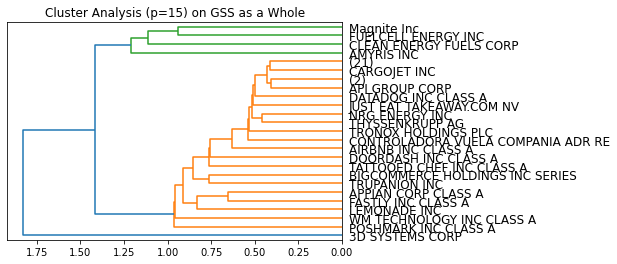

In [66]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(X)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
Z = plot_dendrogram(model, truncate_mode='level',labels=names,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.title("Cluster Analysis (p=15) on GSS as a Whole")
plt.savefig(dirpath+"Total_Cluster.png") 


## Shorts

In [67]:
attrib

,Security Description,Market Value %,ACUSIP
0,APOLLO GLOBAL MANAGEMENT INC CLASS,0.0940,03768E105
1,CONTROLADORA VUELA COMPANIA ADR RE,0.0494,21240E105
2,ELEMENT FLEET MANAGEMENT CORP,0.0541,SB7FNMQ21
3,ARITZIA SUBORDINATE VOTING INC,0.0304,SBDCG2C28
4,API GROUP CORP,0.0404,00187Y100
5,BERRY GLOBAL GROUP INC,0.0461,08579W103
6,WILLSCOT MOBILE MINI HOLDINGS CORP,0.1450,971378104
7,ALPHABET INC CLASS C,0.0664,SBYY88Y78
9,AMAZON COM INC,0.0201,023135106
10,AON PLC CLASS A,0.0638,SBLP1HW54


Text(0.5, 0, '')

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Short Positions")

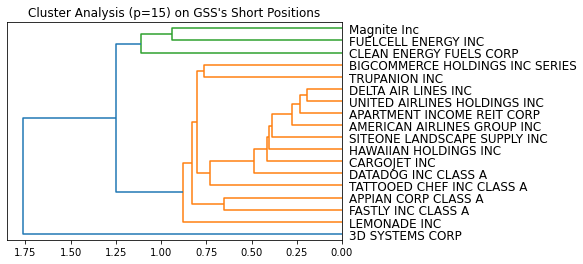

In [68]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(sX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
sZ = plot_dendrogram(model, truncate_mode='level',labels=snames,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.title("Cluster Analysis (p=15) on GSS\'s Short Positions")
plt.savefig(dirpath+"Short_Cluster.png") 



## Longs

Text(0.5, 0, '')

Text(0.5, 1.0, "Cluster Analysis (p=15) on GSS's Long Positions")

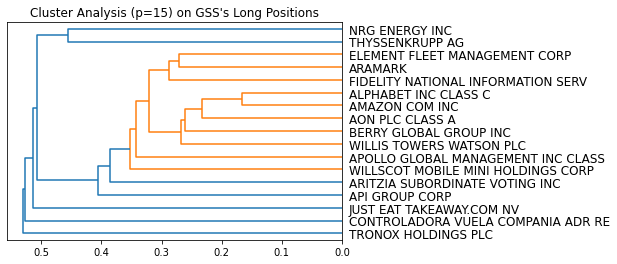

In [69]:
model = AgglomerativeClustering(n_clusters = None,distance_threshold=0, compute_full_tree=True)

model = model.fit(lX)

color_threshold_n = 16

#th = Z[-(color_threshold_n-1),2]  #color_threshold=th,
lZ = plot_dendrogram(model, truncate_mode='level',labels=lnames,
                    p=15,leaf_font_size=12,orientation='left',get_leaves=True,distance_sort=True)
plt.xlabel("")
plt.title("Cluster Analysis (p=15) on GSS\'s Long Positions")
plt.savefig(dirpath+"Long_Cluster.png") 

In [46]:
model.children_.shape[0]
model.labels_

35

array([2, 2, 2, 0, 7, 2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 3, 5, 1, 2, 2, 2,
       6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [499]:
#residuals['AC-15 (longs)'] 
model.labels_.T

array([11, 10, 15, 20, 16, 17, 19,  9, 13,  7, 18,  8, 14,  4,  3,  1,  6,
       12,  5,  2,  0], dtype=int64)

In [497]:
residuals['AC-15 (longs)'].sort_values()

NameError: name 'lresiduals' is not defined

# Regional Style Factors

In [74]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
ffile = 'FactorTSraw.xlsx'
#tab = 'bbTickers'

In [75]:
usfactors = pd.read_excel(dirpath+ffile,sheet_name='USAM')
cafactors = pd.read_excel(dirpath+ffile,sheet_name='CAND')
wldfactors = pd.read_excel(dirpath+ffile,sheet_name='WRLD')
usfactors.set_index('date',inplace=True)
usfactors.sort_index(inplace=True) 
cafactors.set_index('date',inplace=True)
cafactors.sort_index(inplace=True) 
wldfactors.set_index('date',inplace=True)
wldfactors.sort_index(inplace=True) 
us_frets = usfactors.pct_change()
ca_frets = cafactors.pct_change()
wld_frets = wldfactors.pct_change()

In [144]:
us_frets

,FMI_USAM_DIVYIELD,FMI_USAM_EARNYIELD,FMI_USAM_GROWTH,FMI_USAM_LEVERAGE,FMI_USAM_LIQUIDITY,FMI_USAM_MARKET,FMI_USAM_MOMENTUM,FMI_USAM_PROFIT,FMI_USAM_REVERSAL,FMI_USAM_SIZE,FMI_USAM_SMALLCAP,FMI_USAM_VALUE,FMI_USAM_VOLATILITY
date,,,,,,,,,,,,,
2020-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-03,-0.0000,0.0005,0.0014,0.0009,-0.0005,0.0218,-0.0023,-0.0013,-0.0022,-0.0020,0.0002,-0.0012,0.0027
2020-11-04,-0.0059,-0.0047,0.0045,0.0006,-0.0015,0.0113,0.0079,0.0031,-0.0027,0.0030,0.0006,-0.0042,0.0022
2020-11-05,0.0007,-0.0009,0.0003,0.0011,-0.0002,0.0221,0.0027,-0.0012,-0.0021,0.0002,0.0014,0.0030,0.0068
2020-11-06,-0.0013,-0.0008,0.0007,0.0006,0.0008,-0.0023,0.0043,-0.0028,0.0017,0.0009,-0.0000,-0.0020,-0.0027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,-0.0009,-0.0007,0.0003,0.0005,-0.0011,-0.0143,0.0008,0.0012,-0.0004,0.0035,0.0015,-0.0033,-0.0024
2021-10-28,-0.0001,-0.0011,0.0008,-0.0024,0.0013,0.0135,0.0004,0.0003,0.0003,-0.0012,0.0008,-0.0012,0.0048
2021-10-29,-0.0006,-0.0004,-0.0005,-0.0008,0.0002,-0.0003,0.0021,0.0020,0.0021,-0.0003,0.0008,-0.0020,-0.0003


In [76]:

us_frets.apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'US Factor Detailed Stats.xlsx')

In [77]:

ca_frets.apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'CA Factor Detailed Stats.xlsx')

In [78]:
wld_frets.apply(lambda x: utils.RetStats(x,freq='Daily')).to_excel(dirpath+'WLD Factor Detailed Stats.xlsx')

In [79]:
pd.options.display.float_format = "{:,.2}".format  

uscorr = us_frets.corr()
uscorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Correlations.xlsx')

In [80]:
pd.options.display.float_format = "{:,.2}".format  

cacorr = ca_frets.corr()
cacorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Correlations.xlsx')


In [81]:
pd.options.display.float_format = "{:,.2}".format  

wldcorr = wld_frets.corr()
wldcorr.style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Correlations.xlsx')

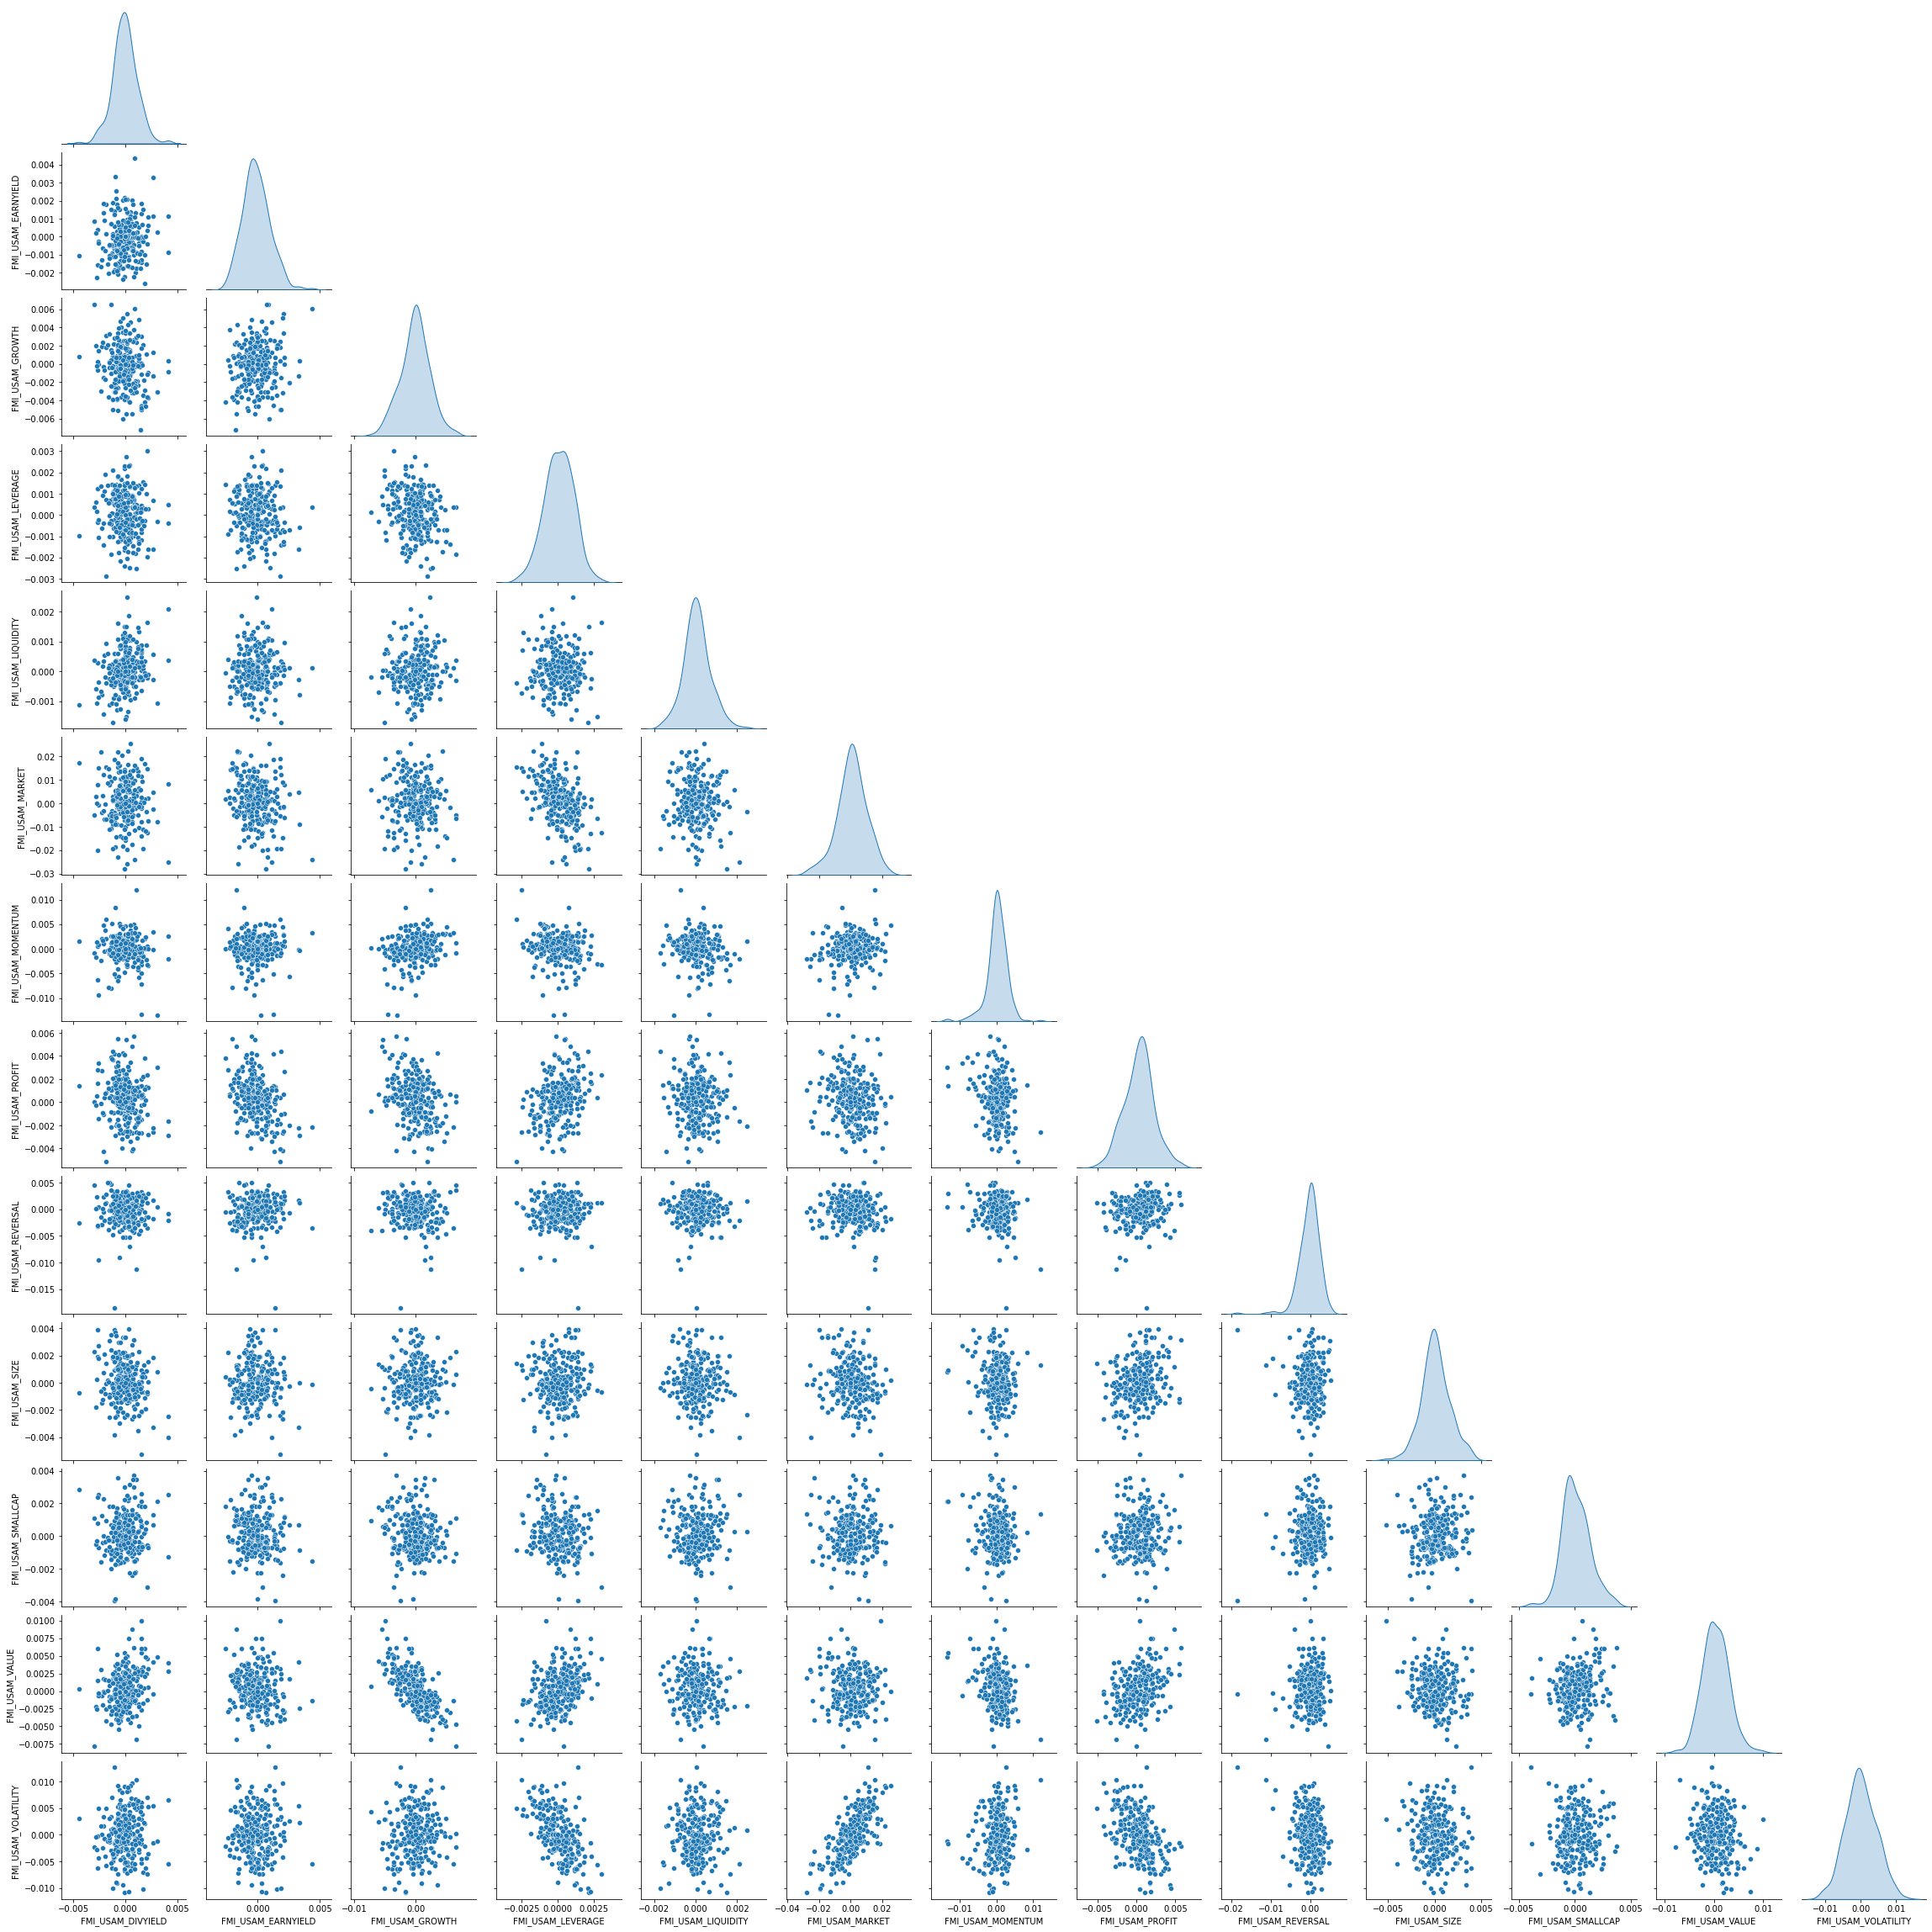

In [82]:

sns_plot = sns.pairplot(us_frets, diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"USStyleFactors_PairPlot.png") 

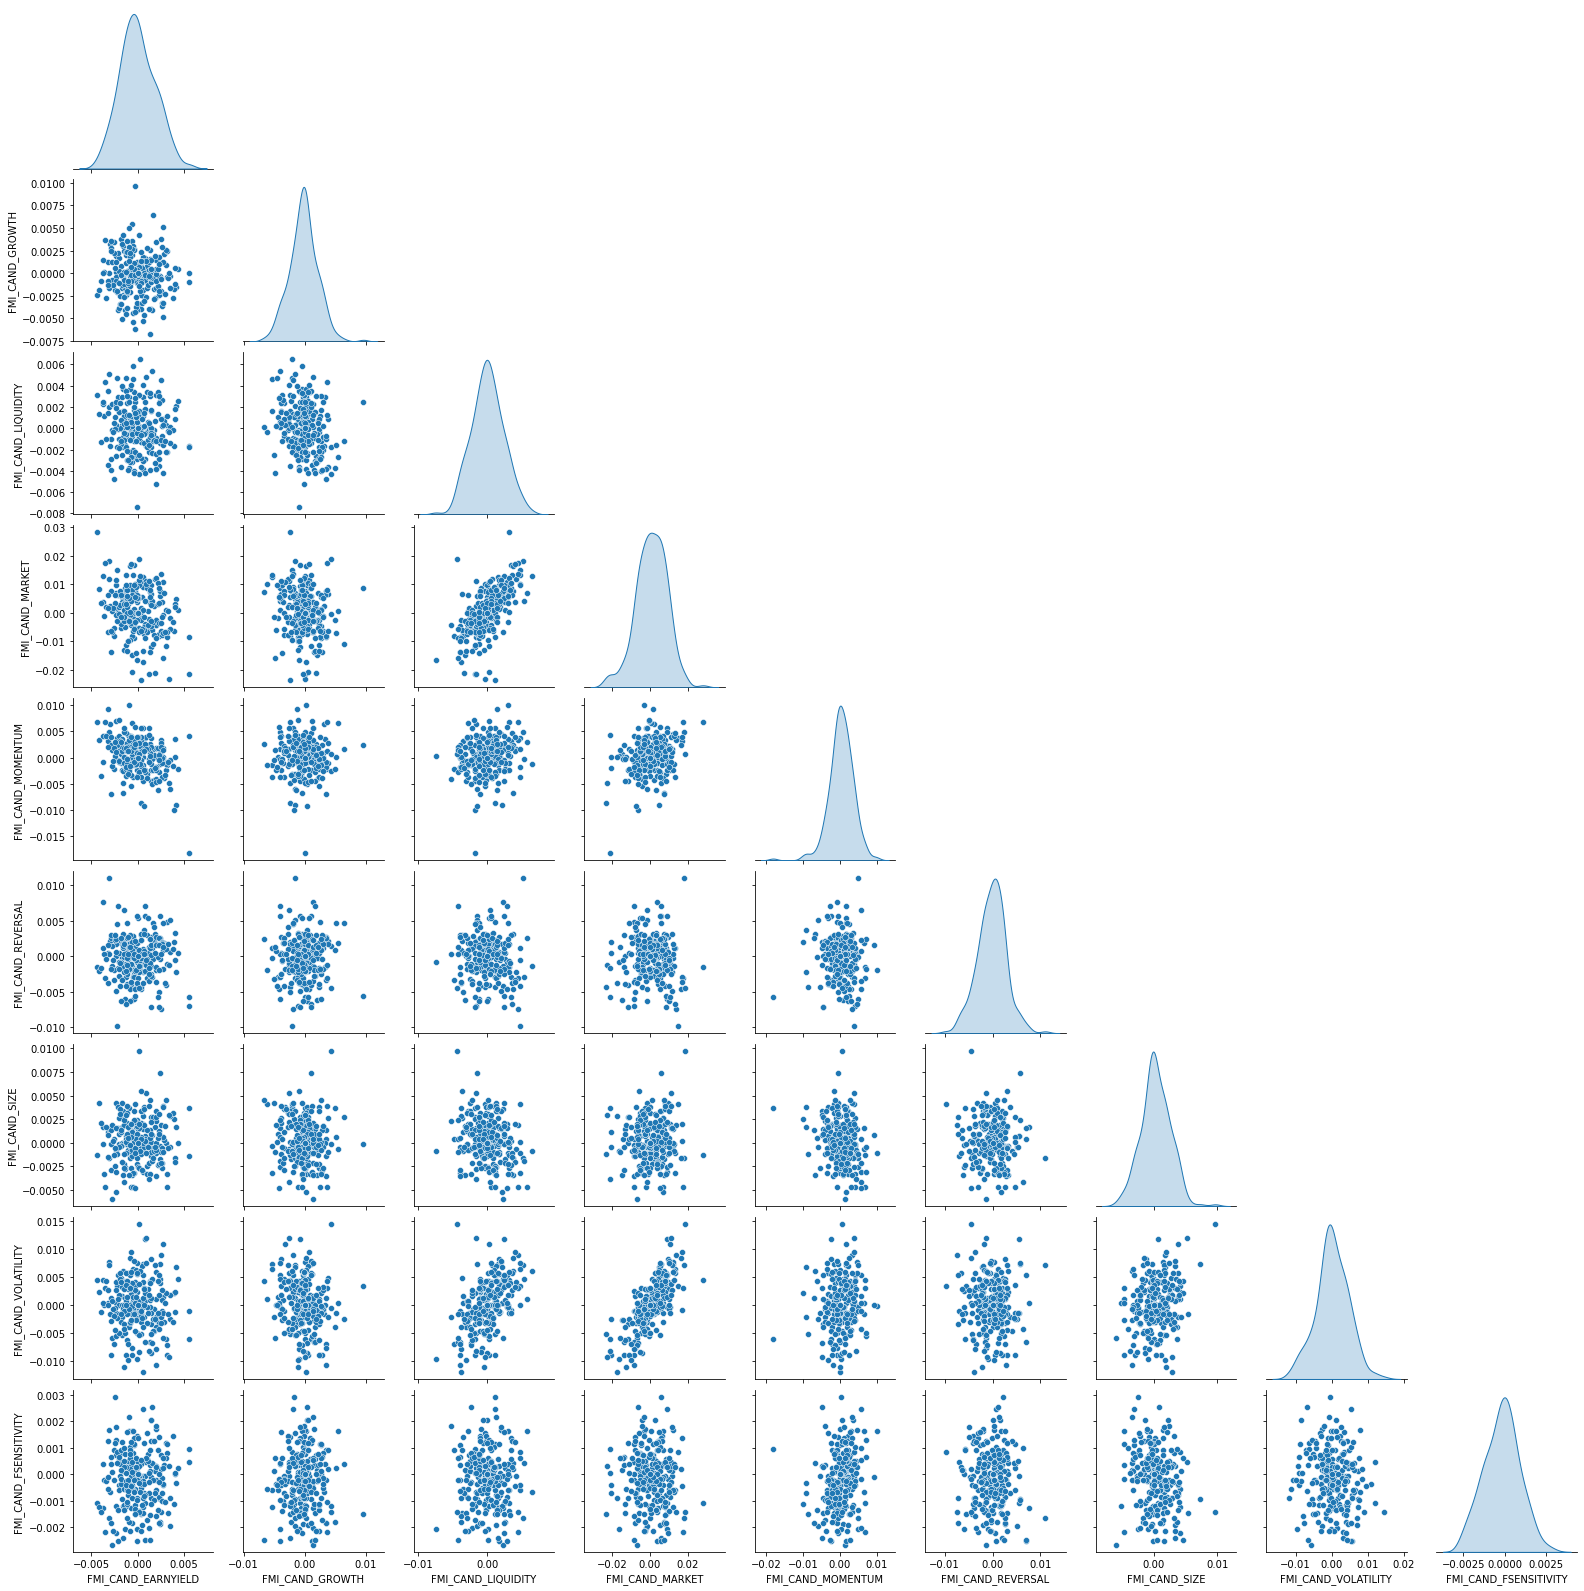

In [83]:
sns_plot = sns.pairplot(ca_frets, diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"CAStyleFactors_PairPlot.png") 

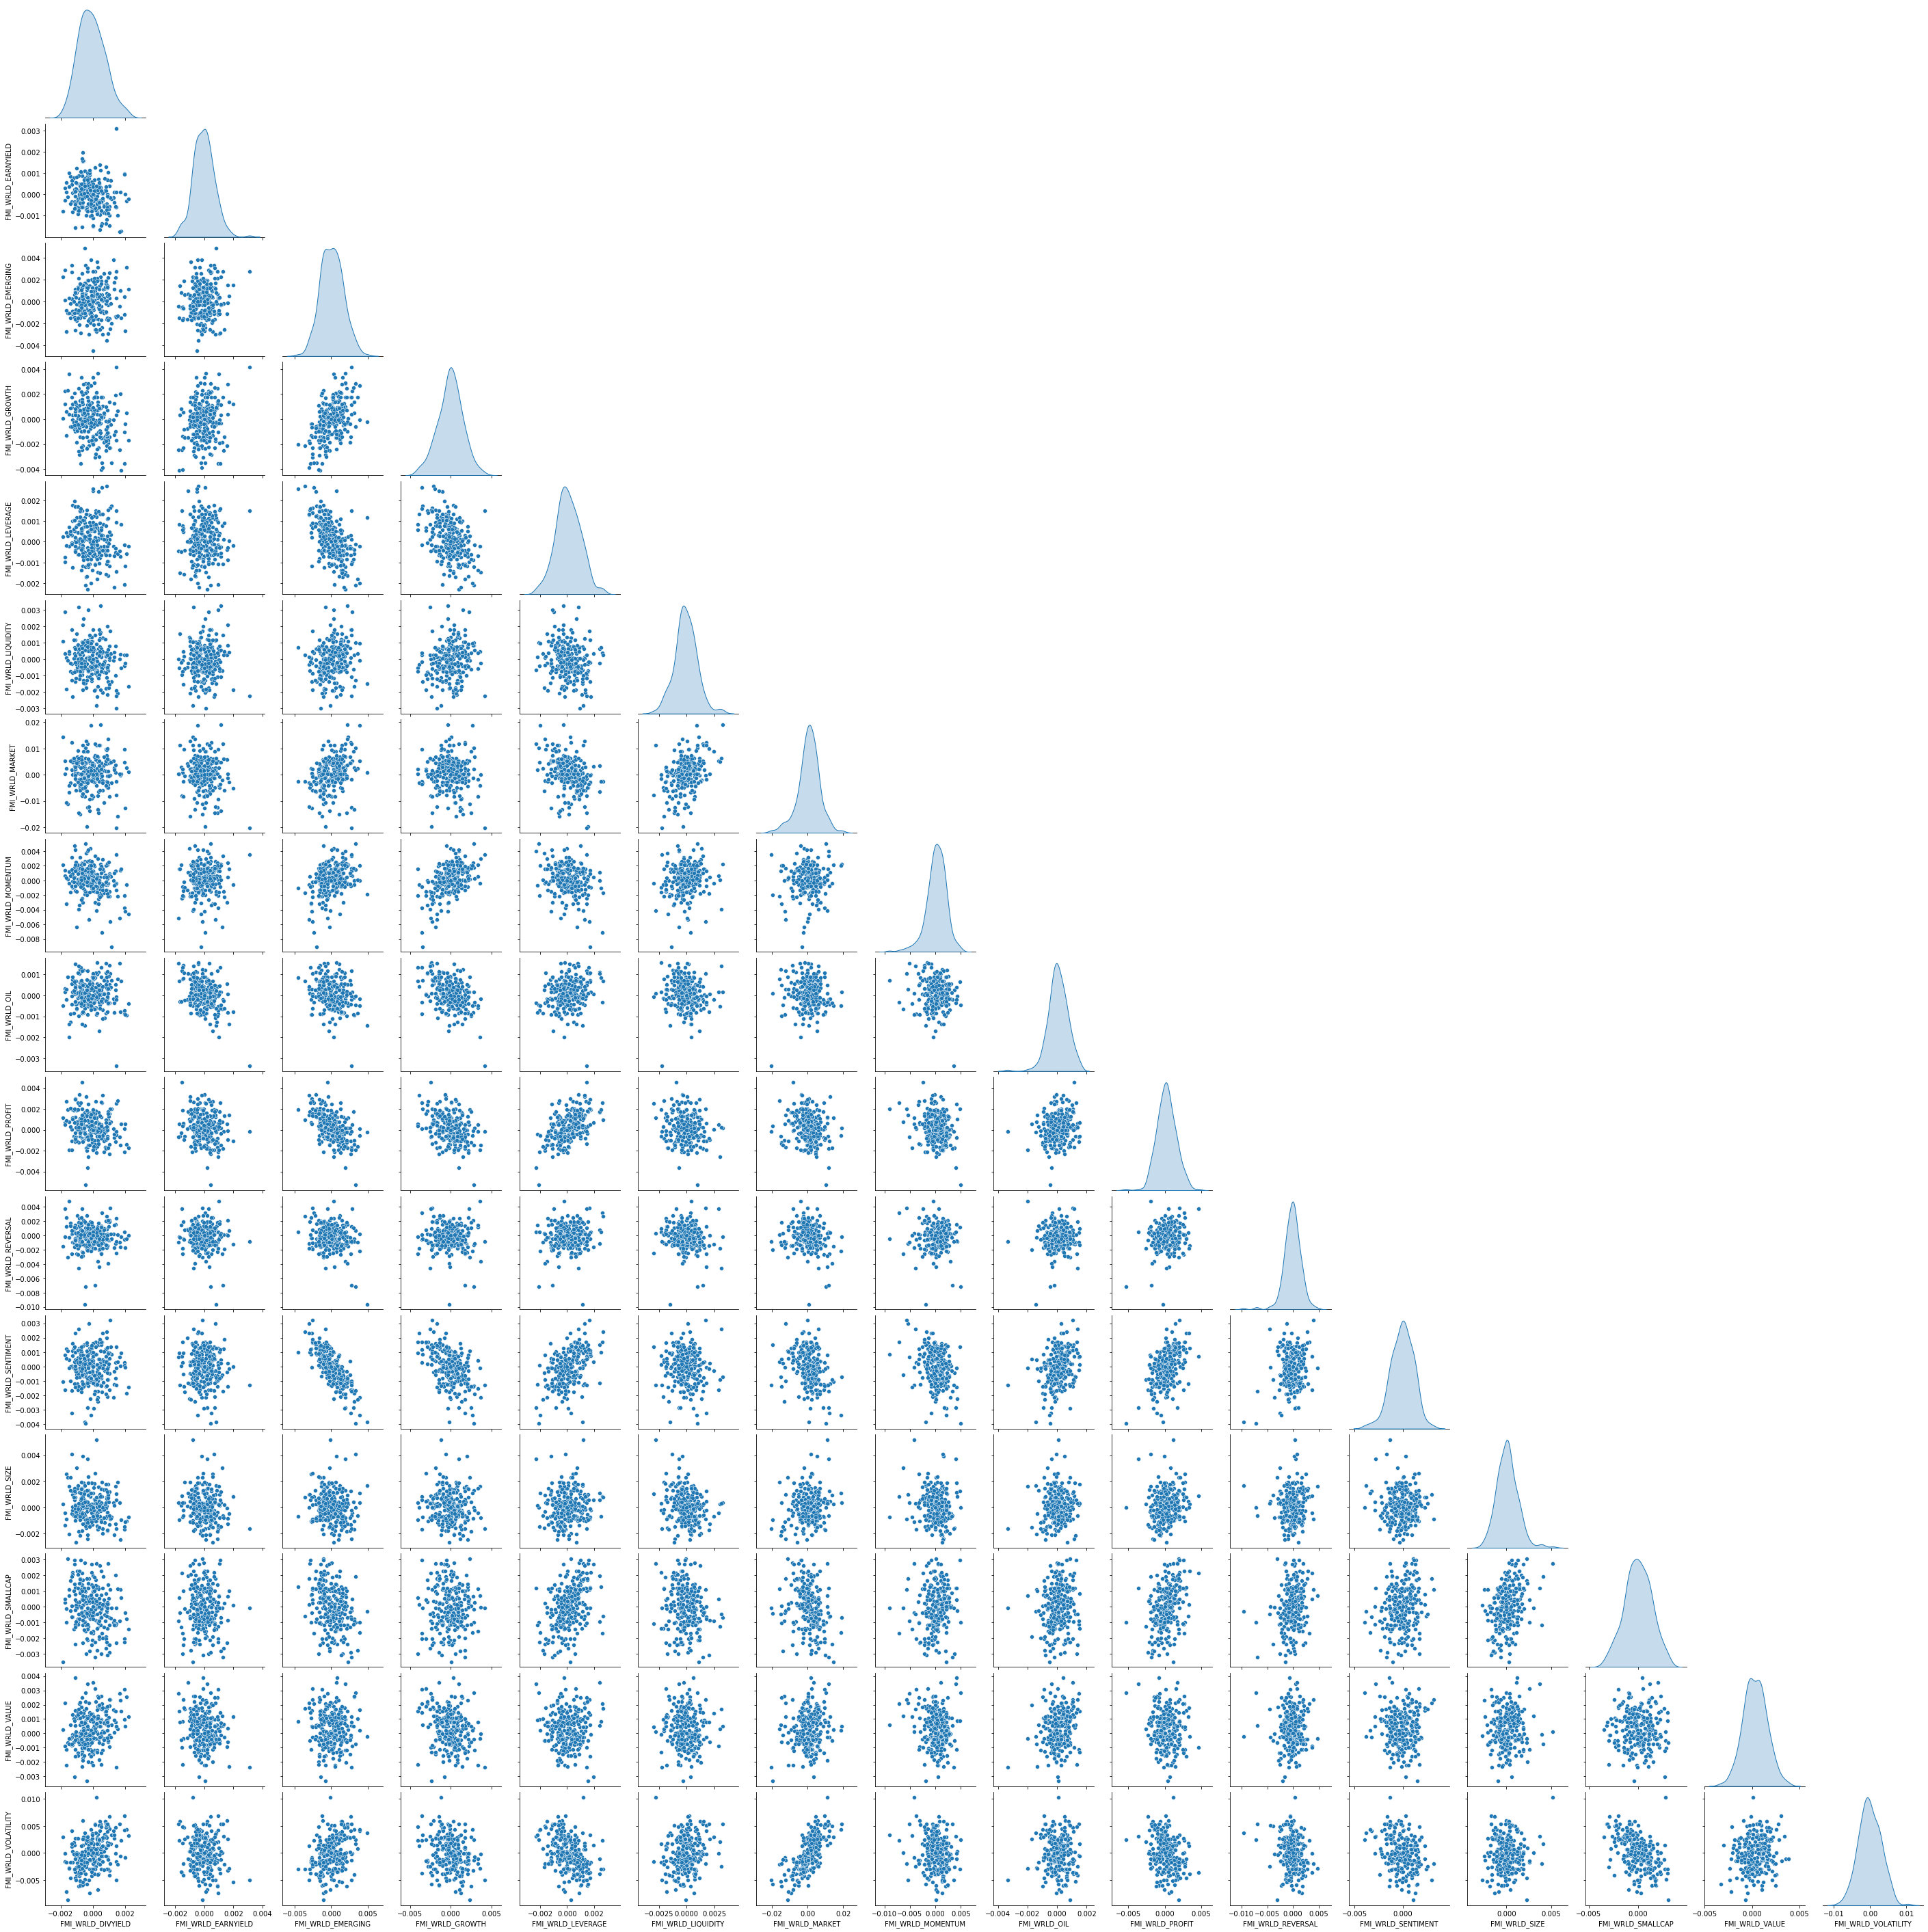

In [84]:
sns_plot = sns.pairplot(wld_frets, diag_kind="kde",corner = True)  #, diag_kind='kde'
fig = sns_plot.fig
fig.savefig( dirpath +"WldStyleFactors_PairPlot.png") 

In [85]:
def SimpleRets(sers):
    '''
    Calculates simple returns at various frequencies for different indices
    Arguments:
        r: input vector of index levesl
      
    Return value: pandas series with simple returns on 1wk, 1mo, 3mo and 6mo basis
    

    '''
    oneweek = (sers/sers.shift(5)-1)*100
    onemonth = (sers/sers.shift(21)-1)*100
    threemonth = (sers/sers.shift(63)-1 )*100 
    sixmonth = (sers/sers.shift(126)-1)*100    

    owsers = oneweek.loc[oneweek.index[-1]]
    omsers = onemonth.loc[onemonth.index[-1]]
    tmsers = threemonth.loc[threemonth.index[-1]]
    smsers = sixmonth.loc[sixmonth.index[-1]]
    data = pd.concat([owsers,omsers,tmsers,smsers],axis=1)
    RetStats = pd.DataFrame(data.values,index=sers.columns,columns=["1 Week %","1 Month %", "3 Month %",'6 Month %'])#\
                              #.apply(lambda x: '{:.2%}'.format(x))
    
    
    return(RetStats)

In [86]:
SimpleRets(usfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'US Factor Returns.xlsx')
SimpleRets(cafactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'CA Factor Returns.xlsx')
SimpleRets(wldfactors).style.background_gradient(cmap='coolwarm').format(precision=2).to_excel(dirpath+'WLD Factor Returns.xlsx')

In [218]:
usfactors.columns.str.lstrip('FMI_USAM')

Index(['DIVYIELD', 'EARNYIELD', 'GROWTH', 'LEVERAGE', 'LIQUIDITY', 'RKET',
       'OMENTUM', 'PROFIT', 'REVERSAL', 'ZE', 'LLCAP', 'VALUE', 'VOLATILITY'],
      dtype='object')

# Sector by Factor loadings

In [3]:
dirpath = 'Z:/Shared/Risk Management and Investment Technology/Equity Risk Modeling/'
fbsfile = 'Factor Risk Breakdown.xlsx'

In [9]:
unclean = pd.read_excel(dirpath+fbsfile,sheet_name='ONGSS',skiprows=3).dropna(subset=['Filter Level 1'])
unclean

,Title,Filter Level 1,Filter Level 2,Filter Level 3,Level,Factor Type,Factor Level,Factor Vol,Portfolio,Benchmark,Active,Portfolio (bp),Benchmark (bp),Active (bp),Portfolio (bp).1,Benchmark (bp).1,Active (bp).1
0,ONGSS,ONGSS,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,"1,372.5650",NaN,"1,372.5650","1,372.5650",NaN,"1,372.5650"
1,Communication Services,ONGSS,Communication Services,NaN,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,263.9339,NaN,263.9339,152.3655,NaN,152.3655
2,STYLE,ONGSS,Communication Services,STYLE,3.0000,NaN,NaN,NaN,0.1838,NaN,0.1838,186.5287,NaN,186.5287,137.2263,NaN,137.2263
3,Market,ONGSS,Communication Services,STYLE,0.0000,Style Return,4.4550,0.1541,0.1193,NaN,0.1193,183.7853,NaN,183.7853,154.7120,NaN,154.7120
4,Size,ONGSS,Communication Services,STYLE,0.0000,Style Return,1.1322,0.0191,0.3022,NaN,0.3022,57.8342,NaN,57.8342,2.1802,NaN,2.1802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,INDUSTRY,ONGSS,Utilities,INDUSTRY,3.0000,NaN,NaN,NaN,6.2917,NaN,6.2917,41.5829,NaN,41.5829,-12.5528,NaN,-12.5528
379,Utilities,ONGSS,Utilities,INDUSTRY,0.0000,Industry Return,0.6549,0.0661,6.2917,NaN,6.2917,41.5829,NaN,41.5829,-12.5528,NaN,-12.5528
380,FX,ONGSS,Utilities,FX,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,36.5565,NaN,36.5565,-18.4022,NaN,-18.4022
381,CAD/CAD,ONGSS,Utilities,FX,0.0000,FX,0.0100,NaN,-6.2917,NaN,-6.2917,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
unclean.loc[unclean['Filter Level 3']=='STYLE']

,Title,Filter Level 1,Filter Level 2,Filter Level 3,Level,Factor Type,Factor Level,Factor Vol,Portfolio,Benchmark,Active,Portfolio (bp),Benchmark (bp),Active (bp),Portfolio (bp).1,Benchmark (bp).1,Active (bp).1
2,STYLE,ONGSS,Communication Services,STYLE,3.0000,NaN,NaN,NaN,0.1838,NaN,0.1838,186.5287,NaN,186.5287,137.2263,NaN,137.2263
3,Market,ONGSS,Communication Services,STYLE,0.0000,Style Return,4.4550,0.1541,0.1193,NaN,0.1193,183.7853,NaN,183.7853,154.7120,NaN,154.7120
4,Size,ONGSS,Communication Services,STYLE,0.0000,Style Return,1.1322,0.0191,0.3022,NaN,0.3022,57.8342,NaN,57.8342,2.1802,NaN,2.1802
5,Volatility,ONGSS,Communication Services,STYLE,0.0000,Style Return,0.5723,0.0567,-0.0391,NaN,-0.0391,22.1702,NaN,22.1702,-12.9071,NaN,-12.9071
6,Momentum,ONGSS,Communication Services,STYLE,0.0000,Style Return,3.7573,0.0459,0.0517,NaN,0.0517,23.6993,NaN,23.6993,-3.2007,NaN,-3.2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Growth,ONGSS,Utilities,STYLE,0.0000,Style Return,0.7656,0.0230,0.0509,NaN,0.0509,11.6865,NaN,11.6865,0.1814,NaN,0.1814
370,Leverage,ONGSS,Utilities,STYLE,0.0000,Style Return,0.7294,0.0166,-0.0177,NaN,-0.0177,2.9305,NaN,2.9305,-0.0546,NaN,-0.0546
371,Sentiment,ONGSS,Utilities,STYLE,0.0000,Style Return,0.9180,0.0182,-0.0104,NaN,-0.0104,1.8901,NaN,1.8901,0.0227,NaN,0.0227
372,Emerging,ONGSS,Utilities,STYLE,0.0000,Style Return,1.0798,0.0240,-0.0124,NaN,-0.0124,2.9809,NaN,2.9809,-0.7358,NaN,-0.7358
